<a href="https://colab.research.google.com/github/salonichaturvedi/ML-Projects/blob/main/Cryptocurrency%20Price%20Prediction%20Model/Cryptocurrency_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center> Cryptocurrency Prediction with Machine Learning

A cryptocurrency is a digital currency, which is an alternative form of payment created using encryption algorithms. The use of encryption technologies means that cryptocurrencies function both as a currency and as a virtual accounting system.

Bitcoin(BTC), Etherium(ETH), Tether(USDT) are some examples of these

Cryptocurency is a vast and widely spreading investment market, as it is able to give great returns within a very short period of time.

With this Machine learning model, we would be able to predict the future prices of any cryptocurrency.

The price of Cryptocurrency doesnt just depend upon the number of people investing, but also on the financial policies of any government globally regarding any cryptocurrency.

The feelings of investors and endoresements towards a particular cryptocurrency also result in huge buying and selling of the same, consequently resulting in changes in prices.

Thus, there are n number of factors affecting the crypto prices. Using machine learning, we can only predict prices taht would work in situations where prices are affected by the historical data. 
If a person wants to buy or sell any cryptocurrency, and wants to check the possible performance of the same in next given amount of time, based on the earlier prices of say, a year or two, this model would be able to guide good.

In [ ]:
# importing primary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# Installing the yfinance library 

!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 583.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 100.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [ ]:
#importing yfinance to collect latest Crytpocurrency prices data from Yahoo Finance

import yfinance as yf

In [ ]:
# storing today's date in a variable 
today = dt.date.today()
today

datetime.date(2023, 2, 16)

In [ ]:
# defining date range to import price data

d1 = today.strftime('%Y-%m-%d')
end_date = d1 
d2 = dt.date.today() - dt.timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [ ]:
print ('Start_date: '+ start_date)
print ('End_date: '+ end_date)

Start_date: 2021-02-16
End_date: 2023-02-16


In [ ]:
#downloading the data within the given range using yfinance

data = yf.download(tickers='BTC-USD', start= start_date, end= end_date, progress=False)


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-16,47944.457031,50341.101562,47201.304688,49199.871094,49199.871094,77049582886
2021-02-17,49207.277344,52533.914062,49072.378906,52149.007812,52149.007812,80820545404
2021-02-18,52140.972656,52474.105469,51015.765625,51679.796875,51679.796875,52054723579
2021-02-19,51675.980469,56113.652344,50937.277344,55888.132812,55888.132812,63495496918
2021-02-20,55887.335938,57505.226562,54626.558594,56099.519531,56099.519531,68145460026


In [ ]:
# Date is currently the index, Date to a column, and resetting index

data['Date'] = data.index
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
data.reset_index(drop=True, inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-16,47944.457031,50341.101562,47201.304688,49199.871094,49199.871094,77049582886
1,2021-02-17,49207.277344,52533.914062,49072.378906,52149.007812,52149.007812,80820545404
2,2021-02-18,52140.972656,52474.105469,51015.765625,51679.796875,51679.796875,52054723579
3,2021-02-19,51675.980469,56113.652344,50937.277344,55888.132812,55888.132812,63495496918
4,2021-02-20,55887.335938,57505.226562,54626.558594,56099.519531,56099.519531,68145460026


In [ ]:
data.shape

(730, 7)

In the above code, I have collected data containing the Crypto prices for the past 2 years (730 days), and then prepared it for further analysis task.

###Let's visualize the data using candlestick chart.

In [ ]:
import plotly.graph_objects as go # importing the plotly library


In [ ]:
ct = go.Candlestick(x=data['Date'], open = data['Open'], close=data['Close'], high=data['High'], low=data['Low'])
ct

Candlestick({
    'close': array([49199.87109375, 52149.0078125 , 51679.796875  , ..., 21808.1015625 ,
                    22220.8046875 , 24307.84179688]),
    'high': array([50341.1015625 , 52533.9140625 , 52474.10546875, ..., 21898.4140625 ,
                   22293.140625  , 24307.84179688]),
    'low': array([47201.3046875 , 49072.37890625, 51015.765625  , ..., 21460.08789062,
                  21632.39453125, 22082.76953125]),
    'open': array([47944.45703125, 49207.27734375, 52140.97265625, ..., 21787.        ,
                   21801.82226562, 22220.5859375 ]),
    'x': array([datetime.datetime(2021, 2, 16, 0, 0),
                datetime.datetime(2021, 2, 17, 0, 0),
                datetime.datetime(2021, 2, 18, 0, 0), ...,
                datetime.datetime(2023, 2, 13, 0, 0),
                datetime.datetime(2023, 2, 14, 0, 0),
                datetime.datetime(2023, 2, 15, 0, 0)], dtype=object)
})

In [ ]:
figure = go.Figure(data=[go.Candlestick(x=data['Date'], open = data['Open'], close=data['Close'], high=data['High'], low=data['Low'])])
figure.update_layout(title= 'Crypto Price Analysis', xaxis_rangeslider_visible=False)
figure.show()

*The **Close** column in the dataset contains the values we need to predict.*

Let's have a look at the correlation of all the columns concerning the Close column.

In [ ]:
correlation_data= data.corr()
correlation_data

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998189,0.996182,0.994924,0.994924,0.333722
High,0.998189,1.000000,0.996094,0.997638,0.997638,0.343142
Low,0.996182,0.996094,1.000000,0.997556,0.997556,0.299678
Close,0.994924,0.997638,0.997556,1.000000,1.000000,0.320950
Adj Close,0.994924,0.997638,0.997556,1.000000,1.000000,0.320950
Volume,0.333722,0.343142,0.299678,0.320950,0.320950,1.000000


In [ ]:
# in order to have a clearer look, lets call for only Close Column from correlation data

correlation_data['Close']. sort_values(ascending=False)

Close        1.000000
Adj Close    1.000000
High         0.997638
Low          0.997556
Open         0.994924
Volume       0.320950
Name: Close, dtype: float64

#<center> Prediction Model

Predicting the future prices of Bitcoin using **AutoTS library**. This is considered the best library for time series analysis.

In [ ]:
#installing the autots library
!pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.4/686.4 KB 32.7 MB/s eta 0:00:00


In [ ]:
#importing AutoTS
from autots import AutoTS

In [ ]:
model = AutoTS(forecast_length=30, frequency = 'infer', ensemble= 'simple')
model=model.fit(df=data, date_col= 'Date', value_col= 'Close', id_col= None)
# predicting using predict algorithm

prediction = model.predict()
prediction


Inferred frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 7 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
22/22 [==============================] - 11s 4ms/step - loss: 0.4164
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4102
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4071
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4033
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4017
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.3984
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.3965
Epoch 8/50
22/22 [==============================] - 0s 4ms/step - loss: 0.3992
Epoch 9/50
22/22 [==============================] - 0s 5ms/step - loss: 0.3989
Epoch 10/50
22/22 [==============================] - 0s 5ms/step - loss: 0.3974
Epoch 11/50
22/22 [==============================] - 0s 5ms/step - loss: 0.3943
Epoch 12/50
22/22 [==============================] - 0s 4ms/

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/ap2ss_e3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/v7z_waog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18752', 'data', 'file=/tmp/tmpra4w_7h_/ap2ss_e3.json', 'init=/tmp/tmpra4w_7h_/v7z_waog.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_m

Model Number: 36 with model FBProphet in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 37: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents in generation 0 of 10
Model Number: 45 with model ETS in generation 0 of 10
Model Number: 46 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 46: VECM
Model Number: 47 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/pombhp0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/rt2xxhnr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82018', 'data', 'file=/tmp/tmpra4w_7h_/pombhp0l.json', 'init=/tmp/tmpra4w_7h_/rt2xxhnr.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model41nv0nfp/prophet_model-20230216075403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 55 with model FBProphet in generation 0 of 10


07:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 56 with model SeasonalNaive in generation 0 of 10
Model Number: 57 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


Model Number: 58 with model NVAR in generation 0 of 10
Model Number: 59 with model Theta in generation 0 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 60 with model UnivariateRegression in generation 0 of 10
Model Number: 61 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 61: ARCH
Model Number: 62 with model ConstantNaive in generation 0 of 10
Model Number: 63 with model LastValueNaive in generation 0 of 10
Model Number: 64 with model AverageValueNaive in generation 0 of 10
Model Number: 65 with model GLS in generation 0 of 10
Model Number: 66 with model SeasonalNaive in generation 0 of 10
Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 67: GLM
Model Number: 68 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/o0tdj5cr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/mzh5b443.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90174', 'data', 'file=/tmp/tmpra4w_7h_/o0tdj5cr.json', 'init=/tmp/tmpra4w_7h_/mzh5b443.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelxyg2zlan/prophet_model-20230216075404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 70: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Model Number: 72 with model VAR in generation 0 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: ValueError('Only gave one variable to VAR') in model 72: VAR
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 73: VECM
Model Number: 74 with model ARIMA in generation 0 of 10
Model Number: 75 with model WindowRegression in generation 0 of 10
Template Eval Error: KeyError('model') in model 75: WindowRegression
Model Number: 76 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 76: DatepartRegression
Model Number: 77 with model Univa

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 94 with model ETS in generation 0 of 10
Model Number: 95 with model AverageValueNaive in generation 0 of 10
Model Number: 96 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 96: VAR
Model Number: 97 with model GLS in generation 0 of 10
Model Number: 98 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/api.py)") in model 98: ARDL
Model Number: 99 with model UnivariateMotif in generation 0 of 10
Model Number: 100 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/api.py)") in model 100: ARDL
Model Number: 101 with model ETS in generation 0 of 10
Model Number: 102 with model UnivariateMotif in generation 0 of 10
Model Number: 103 with model SeasonalNaive in 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 112 with model MetricMotif in generation 0 of 10
Model Number: 113 with model AverageValueNaive in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 114 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/api.py)") in model 114: ARDL
Model Number: 115 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/api.py)") in model 115: ARDL
Model Number: 116 with model SeasonalNaive in generation 0 of 10
Model Number: 117 with model SeasonalNaive in generation 0 of 10
Model Number: 118 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 118: ARDL
Model Number: 119 with model ConstantNaive in generation 0 of 10
Model Number: 120 with model ARIMA in generation 0 of 10
Model Number: 121 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed fr

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 126 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 126: GLM
Model Number: 127 with model LastValueNaive in generation 0 of 10
Model Number: 128 with model SectionalMotif in generation 0 of 10
Model Number: 129 with model ConstantNaive in generation 0 of 10
Model Number: 130 with model UnivariateMotif in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 132: VAR
Model Number: 133 with model UnivariateMotif in generation 0 of 10
Model Number: 134 with model SeasonalNaive in generation 0 of 10
Model Number: 135 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 135: ARCH
Model Number: 136 with model LastValueNaive in generation 0 of 10
Model Number: 137 with

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52442e-25): result may not be accurate.



Model Number: 162 with model SectionalMotif in generation 0 of 10
Model Number: 163 with model Theta in generation 0 of 10
Model Number: 164 with model AverageValueNaive in generation 0 of 10
Model Number: 165 with model Theta in generation 0 of 10
Model Number: 166 with model ETS in generation 0 of 10
Model Number: 167 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 167: GLM
Model Number: 168 with model MultivariateMotif in generation 0 of 10
Model Number: 169 with model ConstantNaive in generation 0 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 169: ConstantNaive
Model Number: 170 with model ARCH in generation 0 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/tc6m8jtq.json
DEBUG:cmdstanpy:input tempfile: /tmp/t

Template Eval Error: ImportError('`arch` package must be installed from pip') in model 170: ARCH
Model Number: 171 with model FBProphet in generation 0 of 10


07:54:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 172 with model AverageValueNaive in generation 0 of 10
Model Number: 173 with model MultivariateMotif in generation 0 of 10
Model Number: 174 with model Theta in generation 0 of 10
Model Number: 175 with model GLM in generation 0 of 10
Model Number: 176 with model UnivariateMotif in generation 0 of 10
Model Number: 177 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 177: ARDL
Model Number: 178 with model MultivariateMotif in generation 0 of 10
Model Number: 179 with model NVAR in generation 0 of 10
Model Number: 180 with model UnivariateMotif in generation 0 of 10
Model Number: 181 with model Theta in generation 0 of 10
Model Number: 182 with model SectionalMotif in generation 0 of 10
Model Number: 183 with model ARIMA in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 183: ARIMA
Model Number: 184 with model VECM in generation 0 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/3qhyomxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/fohenqxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18799', 'data', 'file=/tmp/tmpra4w_7h_/3qhyomxy.json', 'init=/tmp/tmpra4w_7h_/fohenqxp.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model4yl_pgyq/prophet_model-20230216075446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 192 with model FBProphet in generation 1 of 10


07:54:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 193 with model NVAR in generation 1 of 10
Model Number: 194 with model Theta in generation 1 of 10
Model Number: 195 with model UnobservedComponents in generation 1 of 10
Model Number: 196 with model SeasonalNaive in generation 1 of 10
Model Number: 197 with model MultivariateMotif in generation 1 of 10
Model Number: 198 with model GLS in generation 1 of 10
Model Number: 199 with model LastValueNaive in generation 1 of 10
Model Number: 200 with model GLS in generation 1 of 10
Model Number: 201 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 201: NVAR
Model Number: 202 with model MetricMotif in generation 1 of 10
Model Number: 203 with model DatepartRegression in generation 1 of 10
Model Number: 204 with model GLM in generation 1 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 205 with model MetricMotif in generation 1 of 10
Model Number: 206 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 206: NVAR
Model Number: 207 with model DatepartRegression in generation 1 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.698e+09, tolerance: 3.719e+05

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/2dytdm12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/he9g3gy2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75305', 'data', 'file=/tmp/tmpra4w_7h_/2dytdm12.json', 'init=/tmp/tmpra4w_7h_/he9g3gy2.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelxw1nmfyb/prophet_model-202

Model Number: 208 with model FBProphet in generation 1 of 10


07:54:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 209 with model ETS in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/krqbi5jc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/l9cgy7bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55513', 'data', 'file=/tmp/tmpra4w_7h_/krqbi5jc.json', 'init=/tmp/tmpra4w_7h_/l9cgy7bw.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelhrfuo172/prophet_model-20230216075449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 210 with model FBProphet in generation 1 of 10


07:54:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 211 with model AverageValueNaive in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/ununmfrp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/uuz6lrp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74775', 'data', 'file=/tmp/tmpra4w_7h_/ununmfrp.json', 'init=/tmp/tmpra4w_7h_/uuz6lrp8.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeljrwo3tx_/prophet_model-20230216075449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 212 with model FBProphet in generation 1 of 10
No anomalies detected.


07:54:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 213 with model NVAR in generation 1 of 10
Model Number: 214 with model WindowRegression in generation 1 of 10
Model Number: 215 with model LastValueNaive in generation 1 of 10
Model Number: 216 with model Theta in generation 1 of 10
Model Number: 217 with model MetricMotif in generation 1 of 10
Model Number: 218 with model Theta in generation 1 of 10
Model Number: 219 with model NVAR in generation 1 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 219: NVAR
Model Number: 220 with model SectionalMotif in generation 1 of 10
Model Number: 221 with model SeasonalNaive in generation 1 of 10
Model Number: 222 with model SeasonalNaive in generation 1 of 10
Model Number: 223 with model GLS in generation 1 of 10
Model Number: 224 with model SeasonalNaive in generation 1 of 10
Model Number: 225 with model MetricMotif in generation 1 of 10
Model Number: 226 with model MetricMotif in generation 1 of 10
Model N

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log



Model Number: 232 with model SectionalMotif in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 232: SectionalMotif
Model Number: 233 with model MetricMotif in generation 1 of 10
Model Number: 234 with model SeasonalNaive in generation 1 of 10
Model Number: 235 with model SectionalMotif in generation 1 of 10
Model Number: 236 with model LastValueNaive in generation 1 of 10
Model Number: 237 with model SectionalMotif in generation 1 of 10
Model Number: 238 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 238: DatepartRegression
Model Number: 239 with model NVAR in generation 1 of 10
Model Number: 240 with model MultivariateRegression in generation 1 of 10
Model Number: 241 with model LastValueNaive in generation 1 of 10
Model Number: 242 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on 

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 272 with model SeasonalNaive in generation 1 of 10
Model Number: 273 with model MetricMotif in generation 1 of 10
Model Number: 274 with model Theta in generation 1 of 10
Model Number: 275 with model SectionalMotif in generation 1 of 10
Model Number: 276 with model AverageValueNaive in generation 1 of 10
Model Number: 277 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 277: SectionalMotif
Model Number: 278 with model LastValueNaive in generation 1 of 10
Model Number: 279 with model UnivariateRegression in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 280 with model FBProphet in generation 1 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/tvb5u465.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/5oh633gs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90178', 'data', 'file=/tmp/tmpra4w_7h_/tvb5u465.json', 'init=/tmp/tmpra4w_7h_/5oh633gs.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelia__8dz_/prophet_model-20230216075504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 281 with model DatepartRegression in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 281: DatepartRegression
Model Number: 282 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 282: ARIMA
Model Number: 283 with model NVAR in generation 1 of 10
Model Number: 284 with model LastValueNaive in generation 1 of 10
Model Number: 285 with model AverageValueNaive in generation 1 of 10
Model Number: 286 with model GLM in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 286: GLM
Model Number: 287 with model GLS in generation 1 of 10
Model Number: 288 with model SectionalMotif in generation 1 of 10
Model Number: 289 with model AverageValueNaive in generation 1 of 10
Model Number: 290 with model SectionalMotif in generation 1 of 10
Model Number: 291 with model MultivariateMotif in generation 1 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 297 with model SeasonalNaive in generation 1 of 10
Model Number: 298 with model AverageValueNaive in generation 1 of 10
Model Number: 299 with model ETS in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/p4wi5z5v.json


Model Number: 300 with model FBProphet in generation 1 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/wo_r5kmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71617', 'data', 'file=/tmp/tmpra4w_7h_/p4wi5z5v.json', 'init=/tmp/tmpra4w_7h_/wo_r5kmd.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelsjbcss2i/prophet_model-20230216075507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 301 with model SeasonalNaive in generation 1 of 10
Model Number: 302 with model GLM in generation 1 of 10
Model Number: 303 with model Theta in generation 1 of 10
Model Number: 304 with model ConstantNaive in generation 1 of 10
Model Number: 305 with model AverageValueNaive in generation 1 of 10
Model Number: 306 with model UnivariateMotif in generation 1 of 10
Model Number: 307 with model SeasonalNaive in generation 1 of 10
Model Number: 308 with model LastValueNaive in generation 1 of 10
Model Number: 309 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 309: SectionalMotif
Model Number: 310 with model GLS in generation 1 of 10
Model Number: 311 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmult

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/htzivg11.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/yhrr6xu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82735', 'data', 'file=/tmp/tmpra4w_7h_/htzivg11.json', 'init=/tmp/tmpra4w_7h_/yhrr6xu0.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelocdr2c23/prophet_model-20230216075509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 314 with model FBProphet in generation 2 of 10


07:55:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 315 with model SeasonalNaive in generation 2 of 10
Model Number: 316 with model MultivariateMotif in generation 2 of 10
Model Number: 317 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 318 with model FBProphet in generation 2 of 10
Model Number: 319 with model NVAR in generation 2 of 10
Model Number: 320 with model ConstantNaive in generation 2 of 10
Model Number: 321 with model GLS in generation 2 of 10
Model Number: 322 with model LastValueNaive in generation 2 of 10
Model Number: 323 with model LastValueNaive in generation 2 of 10
Model Number: 324 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 324: SectionalMotif
Model Number: 325 with model MultivariateMotif in generation 2 of 10
Model Number: 326 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 326: FBProphet
Model Number: 327 with model GLS in generation 2 of 10
Model Number: 328 with model LastValueNaive in generation 2 of 10
Model Number: 329 with model GLM in generation 2 of 10
Model Number: 330 with mo

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp



Model Number: 332 with model UnivariateRegression in generation 2 of 10
Model Number: 333 with model AverageValueNaive in generation 2 of 10
Model Number: 334 with model ETS in generation 2 of 10
Model Number: 335 with model LastValueNaive in generation 2 of 10
Model Number: 336 with model AverageValueNaive in generation 2 of 10
Model Number: 337 with model UnobservedComponents in generation 2 of 10
Model Number: 338 with model SectionalMotif in generation 2 of 10
Model Number: 339 with model UnobservedComponents in generation 2 of 10
Model Number: 340 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/c6l9nsqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/7a285ju5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83193', 'data', 'file=/tmp/tmpra4w_7h_/c6l9nsqa.json', 'init=/tmp/tmpra4w_7h_/7a285ju5.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelem4do3rz/prophet_model-20230216075512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 341 with model Theta in generation 2 of 10
Model Number: 342 with model ETS in generation 2 of 10
Model Number: 343 with model ARIMA in generation 2 of 10
HolidayTransformer: no anomalies detected.
Model Number: 344 with model LastValueNaive in generation 2 of 10
Model Number: 345 with model UnivariateMotif in generation 2 of 10
Model Number: 346 with model AverageValueNaive in generation 2 of 10
Model Number: 347 with model ConstantNaive in generation 2 of 10
Model Number: 348 with model UnivariateMotif in generation 2 of 10
Model Number: 349 with model NVAR in generation 2 of 10
Model Number: 350 with model GLM in generation 2 of 10
Model Number: 351 with model GLS in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/lvxk_w0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/u48kfp6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2303', 'data', 'file=/tmp/tmpra4w_7h_/lvxk_w0r.json', 'init=/tmp/tmpra4w_7h_/u48kfp6_.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeldt3je6mk/prophet_model-20230216075514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 352 with model FBProphet in generation 2 of 10


07:55:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 353 with model FBProphet in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 353: FBProphet
Model Number: 354 with model UnivariateMotif in generation 2 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 354: UnivariateMotif
Model Number: 355 with model UnivariateMotif in generation 2 of 10
Model Number: 356 with model SectionalMotif in generation 2 of 10
Model Number: 357 with model MetricMotif in generation 2 of 10
Model Number: 358 with model AverageValueNaive in generation 2 of 10
Model Number: 359 with model WindowRegression in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/one3a7xy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/zgvvvgiq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74761', 'data', 'file=/tmp/tmpra4w_7h_/one3a7xy.json', 'init=/tmp/tmpra4w_7h_/zgvvvgiq.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model7sd1xgru/prophet_model-20230216075515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 360 with model FBProphet in generation 2 of 10


07:55:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 361 with model SeasonalNaive in generation 2 of 10
Model Number: 362 with model GLS in generation 2 of 10
Model Number: 363 with model ARIMA in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 363: ARIMA
Model Number: 364 with model NVAR in generation 2 of 10
Model Number: 365 with model MultivariateMotif in generation 2 of 10
Model Number: 366 with model SeasonalNaive in generation 2 of 10
Model Number: 367 with model NVAR in generation 2 of 10
Model Number: 368 with model SeasonalNaive in generation 2 of 10
Model Number: 369 with model ETS in generation 2 of 10
Model Number: 370 with model ARIMA in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 370: ARIMA
Model Number: 371 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 371: LastValueNaive
Model Number: 372 with mo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/17_c4bqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/jp0nyto1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94261', 'data', 'file=/tmp/tmpra4w_7h_/17_c4bqy.json', 'init=/tmp/tmpra4w_7h_/jp0nyto1.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model3tc1x8gd/prophet_model-20230216075522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 392 with model FBProphet in generation 2 of 10


07:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 393 with model MetricMotif in generation 2 of 10
Model Number: 394 with model MultivariateRegression in generation 2 of 10
Model Number: 395 with model Theta in generation 2 of 10
Model Number: 396 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 397 with model LastValueNaive in generation 2 of 10
Model Number: 398 with model UnivariateMotif in generation 2 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 398: UnivariateMotif
Model Number: 399 with model SectionalMotif in generation 2 of 10
Model Number: 400 with model MetricMotif in generation 2 of 10


/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 401 with model GLS in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 401: GLS
Model Number: 402 with model UnobservedComponents in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 402: UnobservedComponents
Model Number: 403 with model MetricMotif in generation 2 of 10
Model Number: 404 with model NVAR in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/wicliyk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/xofdx1ra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6874', 'data', 'file=/tmp/tmpra4w_7h_/wicliyk0.json', 'init=/tmp/tmpra4w_7h_/xofdx1ra.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model6cph77ti/prophet_model-20230216075524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 405 with model FBProphet in generation 2 of 10


07:55:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 406 with model GLS in generation 2 of 10
Model Number: 407 with model GLM in generation 2 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 407: GLM
Model Number: 408 with model FBProphet in generation 2 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.622e+09, tolerance: 1.428e+07

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/4b62vi51.json
DEBUG:cmdstanpy

Model Number: 409 with model MetricMotif in generation 2 of 10
Model Number: 410 with model LastValueNaive in generation 2 of 10
Model Number: 411 with model AverageValueNaive in generation 2 of 10
Model Number: 412 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 412: DatepartRegression
Model Number: 413 with model ETS in generation 2 of 10
Model Number: 414 with model SectionalMotif in generation 2 of 10
Model Number: 415 with model ConstantNaive in generation 2 of 10
Model Number: 416 with model LastValueNaive in generation 2 of 10
Model Number: 417 with model ETS in generation 2 of 10
Model Number: 418 with model ARIMA in generation 2 of 10
Model Number: 419 with model GLM in generation 2 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 419: GLM
Model Number: 420 with model MetricMotif in generation 2 of 10
Model

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:319: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:698: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:798: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:1198: RuntimeWarning:

invalid

Model Number: 423 with model SectionalMotif in generation 2 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 424 with model Theta in generation 2 of 10
Model Number: 425 with model ARIMA in generation 2 of 10
Model Number: 426 with model GLS in generation 2 of 10
Model Number: 427 with model MetricMotif in generation 2 of 10
Model Number: 428 with model LastValueNaive in generation 2 of 10
Model Number: 429 with model ETS in generation 2 of 10
Model Number: 430 with model MetricMotif in generation 2 of 10
Model Number: 431 with model UnivariateRegression in generation 2 of 10
Model Number: 432 with model Theta in generation 2 of 10
Model Number: 433 with model GLM in generation 2 of 10
Model Number: 434 with model SeasonalNaive in generation 2 of 10
Model Number: 435 with model LastValueNaive in generation 2 of 10
Model Number: 436 with model LastValueNaive in generation 2 of 10
New Generation: 3 of 10
Model Number: 437 with model UnobservedComponents in generation 3 of 10
Model Number: 438 with model DatepartRegression in generation 3 of 10
Model Number: 439 with model MetricMo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/dv7e2eqr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/9ij__1c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40087', 'data', 'file=/tmp/tmpra4w_7h_/dv7e2eqr.json', 'init=/tmp/tmpra4w_7h_/9ij__1c6.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelm_krnpcu/prophet_model-20230216075548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

Model Number: 460 with model FBProphet in generation 3 of 10
Model Number: 461 with model ETS in generation 3 of 10
Model Number: 462 with model UnivariateMotif in generation 3 of 10
Model Number: 463 with model NVAR in generation 3 of 10
Model Number: 464 with model UnivariateMotif in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/enu_ilen.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/_glbcr3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Model Number: 465 with model FBProphet in generation 3 of 10


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91058', 'data', 'file=/tmp/tmpra4w_7h_/enu_ilen.json', 'init=/tmp/tmpra4w_7h_/_glbcr3_.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelf0y_hmp3/prophet_model-20230216075549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 466 with model FBProphet in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 466: FBProphet
Model Number: 467 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 467: LastValueNaive
Model Number: 468 with model SeasonalNaive in generation 3 of 10
Model Number: 469 with model GLM in generation 3 of 10
Model Number: 470 with model ARIMA in generation 3 of 10
Model Number: 471 with model UnobservedComponents in generation 3 of 10
Model Number: 472 with model LastValueNaive in generation 3 of 10
Model Number: 473 with model SeasonalNaive in generation 3 of 10
Model Number: 474 with model AverageValueNaive in generation 3 of 10
Model Number: 475 with model SeasonalNaive in generation 3 of 10
Model Number: 476 with model LastValueNaive in generation 3 of 10


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 477 with model MetricMotif in generation 3 of 10
Model Number: 478 with model Theta in generation 3 of 10
Model Number: 479 with model GLM in generation 3 of 10
Model Number: 480 with model LastValueNaive in generation 3 of 10
Model Number: 481 with model GLS in generation 3 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp



Model Number: 482 with model MetricMotif in generation 3 of 10
Model Number: 483 with model ETS in generation 3 of 10
Model Number: 484 with model NVAR in generation 3 of 10
Model Number: 485 with model SectionalMotif in generation 3 of 10
Model Number: 486 with model AverageValueNaive in generation 3 of 10
Model Number: 487 with model ETS in generation 3 of 10
Model Number: 488 with model SectionalMotif in generation 3 of 10
Model Number: 489 with model LastValueNaive in generation 3 of 10
Model Number: 490 with model UnobservedComponents in generation 3 of 10
Model Number: 491 with model UnobservedComponents in generation 3 of 10
Model Number: 492 with model NVAR in generation 3 of 10
Model Number: 493 with model ARIMA in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/yc6mxw3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/b284j07n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79950', 'data', 'file=/tmp/tmpra4w_7h_/yc6mxw3u.json', 'init=/tmp/tmpra4w_7h_/b284j07n.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model38lpsdgg/prophet_model-20230216075559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 494 with model FBProphet in generation 3 of 10
No anomalies detected.


07:56:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 495 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 495: DatepartRegression
Model Number: 496 with model ARIMA in generation 3 of 10
Model Number: 497 with model SeasonalNaive in generation 3 of 10
Model Number: 498 with model SectionalMotif in generation 3 of 10
Model Number: 499 with model ETS in generation 3 of 10
Model Number: 500 with model NVAR in generation 3 of 10
Model Number: 501 with model MetricMotif in generation 3 of 10
Model Number: 502 with model ARIMA in generation 3 of 10
Model Number: 503 with model ETS in generation 3 of 10
Model Number: 504 with model NVAR in generation 3 of 10
Model Number: 505 with model MultivariateMotif in generation 3 of 10
Model Number: 506 with model ARIMA in generation 3 of 10
Model Number: 507 with model SectionalMotif in generation 3 of 10
Model Number: 508 with model UnivariateMotif in generation 3 of 10
Model Number: 509 with model NVAR in gen

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/f25p84ku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/fwf0fp8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11018', 'data', 'file=/tmp/tmpra4w_7h_/f25p84ku.json', 'init=/tmp/tmpra4w_7h_/fwf0fp8y.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model_rc363tb/prophet_model-20230216075606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 513 with model FBProphet in generation 3 of 10


07:56:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 514 with model SeasonalNaive in generation 3 of 10
Model Number: 515 with model UnobservedComponents in generation 3 of 10
Model Number: 516 with model NVAR in generation 3 of 10
Model Number: 517 with model GLM in generation 3 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 517: GLM
Model Number: 518 with model LastValueNaive in generation 3 of 10
HolidayTransformer: no anomalies detected.
Model Number: 519 with model FBProphet in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 519: FBProphet
Model Number: 520 with model UnobservedComponents in generation 3 of 10
Model Number: 521 with model NVAR in generation 3 of 10
Model Number: 522 with model LastValueNaive in generation 3 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply



Model Number: 523 with model GLS in generation 3 of 10
Model Number: 524 with model SeasonalNaive in generation 3 of 10
Model Number: 525 with model NVAR in generation 3 of 10
Model Number: 526 with model ETS in generation 3 of 10
Model Number: 527 with model MultivariateMotif in generation 3 of 10
Model Number: 528 with model MultivariateMotif in generation 3 of 10
Model Number: 529 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 529: ARIMA
Model Number: 530 with model AverageValueNaive in generation 3 of 10
Model Number: 531 with model LastValueNaive in generation 3 of 10
Model Number: 532 with model ARIMA in generation 3 of 10
Model Number: 533 with model GLM in generation 3 of 10
Model Number: 534 with model AverageValueNaive in generation 3 of 10
Model Number: 535 with model LastValueNaive in generation 3 of 10
Model Number: 536 with model GLM in generation 3 of 10
Model Number: 537 with mo

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 539 with model SectionalMotif in generation 3 of 10
Model Number: 540 with model UnivariateMotif in generation 3 of 10
Model Number: 541 with model NVAR in generation 3 of 10
Model Number: 542 with model ARIMA in generation 3 of 10
Model Number: 543 with model GLM in generation 3 of 10
Model Number: 544 with model NVAR in generation 3 of 10
Model Number: 545 with model Theta in generation 3 of 10
Model Number: 546 with model Theta in generation 3 of 10
Model Number: 547 with model UnivariateRegression in generation 3 of 10
Model Number: 548 with model GLS in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 548: GLS
Model Number: 549 with model SeasonalNaive in generation 3 of 10
Model Number: 550 with model NVAR in generation 3 of 10
Model Number: 551 with model ARIMA in generation 3 of 10


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 552 with model SeasonalNaive in generation 3 of 10
Model Number: 553 with model UnivariateMotif in generation 3 of 10
Model Number: 554 with model MetricMotif in generation 3 of 10
Model Number: 555 with model AverageValueNaive in generation 3 of 10
Model Number: 556 with model GLM in generation 3 of 10
Model Number: 557 with model ETS in generation 3 of 10
Model Number: 558 with model ConstantNaive in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/ahe1oyl2.json


Model Number: 559 with model FBProphet in generation 3 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/vnthr849.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19907', 'data', 'file=/tmp/tmpra4w_7h_/ahe1oyl2.json', 'init=/tmp/tmpra4w_7h_/vnthr849.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelu5klpibc/prophet_model-20230216075658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/x8h4ix9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr

Model Number: 560 with model FBProphet in generation 3 of 10
Model Number: 561 with model Theta in generation 3 of 10
New Generation: 4 of 10
Model Number: 562 with model SectionalMotif in generation 4 of 10
Model Number: 563 with model ARIMA in generation 4 of 10
Model Number: 564 with model UnobservedComponents in generation 4 of 10
Model Number: 565 with model AverageValueNaive in generation 4 of 10
Model Number: 566 with model NVAR in generation 4 of 10
Model Number: 567 with model SectionalMotif in generation 4 of 10
Model Number: 568 with model Theta in generation 4 of 10
Model Number: 569 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 570 with model LastValueNaive in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 571 with model SeasonalNaive in generation 4 of 10
Model Number: 572 with model LastValueNaive in generation 4 of 10
Model Number: 573 with model ARIMA in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/4826vwfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/tr92mlix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14592', 'data', 'file=/tmp/tmpra4w_7h_/4826vwfp.json', 'init=/tmp/tmpra4w_7h_/tr92mlix.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model9p3wj1mx/prophet_model-20230216075708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 574 with model FBProphet in generation 4 of 10


07:57:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 575 with model MetricMotif in generation 4 of 10
Model Number: 576 with model GLM in generation 4 of 10
Model Number: 577 with model Theta in generation 4 of 10
Model Number: 578 with model Theta in generation 4 of 10
Model Number: 579 with model SectionalMotif in generation 4 of 10
Model Number: 580 with model Theta in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/7chbqa18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/g8p1p5u7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74004', 'data', 'file=/tmp/tmpra4w_7h_/7chbqa18.json', 'init=/tmp/tmpra4w_7h_/g8p1p5u7.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model8ll8e7u5/prophet_model-20230216075711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 581 with model FBProphet in generation 4 of 10


07:57:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 582 with model ETS in generation 4 of 10
Model Number: 583 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 583: WindowRegression
Model Number: 584 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 584: MultivariateMotif
Model Number: 585 with model ETS in generation 4 of 10
Model Number: 586 with model LastValueNaive in generation 4 of 10
Model Number: 587 with model ARIMA in generation 4 of 10
Model Number: 588 with model SectionalMotif in generation 4 of 10
Model Number: 589 with model LastValueNaive in generation 4 of 10
Model Number: 590 with model UnobservedComponents in generation 4 of 10
Model Number: 591 with model ARIMA in generation 4 of 10
Model Number: 592 with model Theta in generation 4 of 10
Model Number: 593 with model UnobservedComponents in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/tmtmty27.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/w_h1iqgp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79331', 'data', 'file=/tmp/tmpra4w_7h_/tmtmty27.json', 'init=/tmp/tmpra4w_7h_/w_h1iqgp.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelrx35f0kb/prophet_model-20230216075806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Model Number: 594 with model FBProphet in generation 4 of 10


07:58:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 595 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 595: UnobservedComponents
Model Number: 596 with model SeasonalNaive in generation 4 of 10
Model Number: 597 with model Theta in generation 4 of 10
Model Number: 598 with model LastValueNaive in generation 4 of 10
Model Number: 599 with model Theta in generation 4 of 10
Model Number: 600 with model WindowRegression in generation 4 of 10
Model Number: 601 with model MetricMotif in generation 4 of 10
Model Number: 602 with model ETS in generation 4 of 10
Model Number: 603 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 603: GLM
Model Number: 604 with model GLS in generation 4 of 10
Model Number: 605 with model GLS in generation 4 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log



Model Number: 606 with model Theta in generation 4 of 10
Model Number: 607 with model GLS in generation 4 of 10
Model Number: 608 with model UnivariateMotif in generation 4 of 10
Model Number: 609 with model NVAR in generation 4 of 10
Model Number: 610 with model SectionalMotif in generation 4 of 10
Model Number: 611 with model NVAR in generation 4 of 10
Model Number: 612 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 612: MultivariateRegression
Model Number: 613 with model UnivariateMotif in generation 4 of 10
Model Number: 614 with model ConstantNaive in generation 4 of 10
Model Number: 615 with model NVAR in generation 4 of 10
Model Number: 616 with model MetricMotif in generation 4 of 10
Model Number: 617 with model SectionalMotif in generation 4 of 10
Model Number: 618 with model ARIMA in generation 4 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52442e-25): result may not be accurate.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/t1bbkpmw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/jxbdm58o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44507', 'data', 'file=/tmp/tmpra4w_7h_/t1bbkpmw.json', 'init=/tmp/tmpra4w_7h_/jxbdm58o.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelwnxrh3tg/prophet_model-20230216075837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:C

Model Number: 619 with model FBProphet in generation 4 of 10


07:58:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 620 with model MetricMotif in generation 4 of 10
Model Number: 621 with model UnobservedComponents in generation 4 of 10
Model Number: 622 with model LastValueNaive in generation 4 of 10
Model Number: 623 with model UnobservedComponents in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/7nfma7r1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/fmqmmuw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82899', 'data', 'file=/tmp/tmpra4w_7h_/7nfma7r1.json', 'init=/tmp/tmpra4w_7h_/fmqmmuw7.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model3dwmix_0/prophet_model-20230216075838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 624 with model FBProphet in generation 4 of 10


07:58:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 625 with model SeasonalNaive in generation 4 of 10
Model Number: 626 with model SeasonalNaive in generation 4 of 10
Model Number: 627 with model SeasonalNaive in generation 4 of 10
Model Number: 628 with model SeasonalNaive in generation 4 of 10
Model Number: 629 with model SectionalMotif in generation 4 of 10
Model Number: 630 with model ConstantNaive in generation 4 of 10
Model Number: 631 with model ARIMA in generation 4 of 10
Model Number: 632 with model NVAR in generation 4 of 10
Model Number: 633 with model WindowRegression in generation 4 of 10
Model Number: 634 with model GLM in generation 4 of 10
Model Number: 635 with model SectionalMotif in generation 4 of 10
Model Number: 636 with model MetricMotif in generation 4 of 10
Model Number: 637 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 638 with model ARIMA in generation 4 of 10
HolidayTransformer: no anomalies detected.
Model Number: 639 with model ARIMA in generation 4 of 10
Model Number: 640 with model LastValueNaive in generation 4 of 10
Model Number: 641 with model GLS in generation 4 of 10
Model Number: 642 with model SectionalMotif in generation 4 of 10
Model Number: 643 with model UnobservedComponents in generation 4 of 10
Model Number: 644 with model MetricMotif in generation 4 of 10
Model Number: 645 with model ETS in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 645: ETS
Model Number: 646 with model MultivariateMotif in generation 4 of 10
Model Number: 647 with model MetricMotif in generation 4 of 10
Model Number: 648 with model MultivariateMotif in generation 4 of 10
Model Number: 649 with model ConstantNaive in generation 4 of 10
Model Number: 650 with model NVAR in generation 4 of 10
Model Number: 651 with model Theta in generation 4 of 10
Mode

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 663 with model ETS in generation 4 of 10
Model Number: 664 with model GLS in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/evggthwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/zab78i6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5424', 'data', 'file=/tmp/tmpra4w_7h_/evggthwi.json', 'init=/tmp/tmpra4w_7h_/zab78i6x.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelqhm__288/prophet_model-20230216075912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 665 with model FBProphet in generation 4 of 10
No anomalies detected.


07:59:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 666 with model ETS in generation 4 of 10
Model Number: 667 with model AverageValueNaive in generation 4 of 10
Model Number: 668 with model LastValueNaive in generation 4 of 10
Model Number: 669 with model MetricMotif in generation 4 of 10
Model Number: 670 with model ARIMA in generation 4 of 10
Model Number: 671 with model AverageValueNaive in generation 4 of 10
Model Number: 672 with model UnivariateRegression in generation 4 of 10
Model Number: 673 with model ConstantNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 673: ConstantNaive
Model Number: 674 with model ETS in generation 4 of 10
Model Number: 675 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 675: GLM
Model Number: 676 with model FBProphet in generation 4 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/4co6jzg4.json
DEBUG:cmdstanpy:input tempfile: /tmp/t

Model Number: 677 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 677: GLM
Model Number: 678 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 679 with model WindowRegression in generation 4 of 10
Template Eval Error: KeyError('model') in model 679: WindowRegression
Model Number: 680 with model GLS in generation 4 of 10
Model Number: 681 with model LastValueNaive in generation 4 of 10
Model Number: 682 with model MultivariateMotif in generation 4 of 10
Model Number: 683 with model UnivariateMotif in generation 4 of 10
Model Number: 684 with model UnivariateMotif in generation 4 of 10
Model Number: 685 with model GLS in generation 4 of 10
Model Number: 686 with model UnivariateMotif in generation 4 of 10
New Generation: 5 of 10
Model Number: 687 with model MultivariateMotif in generation 5 of 10
Model Number: 688 with model ConstantNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 688: ConstantNaive
Model Number: 689 with model Theta in generation 5 of 10
Model Number: 690 with model MetricMotif in generation 5 of 10
Model Number: 691 with model Theta in gene

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 696 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 696: UnivariateMotif
Model Number: 697 with model SeasonalNaive in generation 5 of 10
Model Number: 698 with model UnobservedComponents in generation 5 of 10
Model Number: 699 with model MetricMotif in generation 5 of 10
Model Number: 700 with model MetricMotif in generation 5 of 10
Model Number: 701 with model ARIMA in generation 5 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 702 with model ETS in generation 5 of 10
Model Number: 703 with model LastValueNaive in generation 5 of 10
Model Number: 704 with model ConstantNaive in generation 5 of 10
Model Number: 705 with model LastValueNaive in generation 5 of 10
Model Number: 706 with model UnobservedComponents in generation 5 of 10
Model Number: 707 with model MultivariateMotif in generation 5 of 10
Model Number: 708 with model SectionalMotif in generation 5 of 10
Model Number: 709 with model UnivariateMotif in generation 5 of 10
Model Number: 710 with model FBProphet in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/uzme55b6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/n177t0jo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1589', 'data', 'file=/tmp/tmpra4w_7h_/uzme55b6.json', 'init=/tmp/tmpra4w_7h_/n177t0jo.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model75dvefqd/prophet_model-20230216075923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 711 with model WindowRegression in generation 5 of 10
Model Number: 712 with model ConstantNaive in generation 5 of 10
Model Number: 713 with model ARIMA in generation 5 of 10
Model Number: 714 with model MetricMotif in generation 5 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 715 with model ARIMA in generation 5 of 10
HolidayTransformer: no anomalies detected.
Model Number: 716 with model MultivariateRegression in generation 5 of 10
Model Number: 717 with model UnivariateMotif in generation 5 of 10
Model Number: 718 with model MetricMotif in generation 5 of 10
Model Number: 719 with model AverageValueNaive in generation 5 of 10
Model Number: 720 with model ETS in generation 5 of 10
Model Number: 721 with model MultivariateMotif in generation 5 of 10
Model Number: 722 with model SectionalMotif in generation 5 of 10
Model Number: 723 with model AverageValueNaive in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/ay8b_nwy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/3qf27w48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58543', 'data', 'file=/tmp/tmpra4w_7h_/ay8b_nwy.json', 'init=/tmp/tmpra4w_7h_/3qf27w48.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelnx2ht3aq/prophet_model-20230216075926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 724 with model FBProphet in generation 5 of 10


07:59:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 725 with model LastValueNaive in generation 5 of 10
Model Number: 726 with model SeasonalNaive in generation 5 of 10
Model Number: 727 with model MultivariateRegression in generation 5 of 10
Model Number: 728 with model UnivariateMotif in generation 5 of 10
Model Number: 729 with model ETS in generation 5 of 10
Model Number: 730 with model UnivariateMotif in generation 5 of 10
Model Number: 731 with model ETS in generation 5 of 10
Model Number: 732 with model MetricMotif in generation 5 of 10
Model Number: 733 with model UnivariateMotif in generation 5 of 10
Model Number: 734 with model Theta in generation 5 of 10
Model Number: 735 with model FBProphet in generation 5 of 10
No anomalies detected.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/nnp0dz7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/8f_jres3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75756', 'data', 'file=/tmp/tmpra4w_7h_/nnp0dz7p.json', 'init=/tmp/tmpra4w_7h_/8f_jres3.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelzkx4wn42/prophet_model-20230216075929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 736 with model MultivariateRegression in generation 5 of 10
Model Number: 737 with model GLM in generation 5 of 10
Model Number: 738 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 738: ARIMA
Model Number: 739 with model GLM in generation 5 of 10
Model Number: 740 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 740: GLM
Model Number: 741 with model SeasonalNaive in generation 5 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/y85zzish.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/b2xeljpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48986', 'data', 'file=/tmp/tmpra4w_7h_/y85zzish.json', 'init=/tmp/tmpra4w_7h_/b2xeljpl.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelti1ec0m_/prophet_model-20230216075931.csv', 'meth

Model Number: 742 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 742: DatepartRegression
Model Number: 743 with model FBProphet in generation 5 of 10


07:59:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 744 with model UnivariateMotif in generation 5 of 10
Model Number: 745 with model LastValueNaive in generation 5 of 10
Model Number: 746 with model NVAR in generation 5 of 10
Model Number: 747 with model UnivariateMotif in generation 5 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 747: UnivariateMotif
Model Number: 748 with model GLM in generation 5 of 10
Model Number: 749 with model AverageValueNaive in generation 5 of 10
Model Number: 750 with model UnivariateRegression in generation 5 of 10
Model Number: 751 with model MultivariateRegression in generation 5 of 10


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 752 with model MultivariateRegression in generation 5 of 10
Model Number: 753 with model SeasonalNaive in generation 5 of 10
Model Number: 754 with model NVAR in generation 5 of 10


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 755 with model SectionalMotif in generation 5 of 10
Model Number: 756 with model UnobservedComponents in generation 5 of 10
Model Number: 757 with model GLS in generation 5 of 10
Model Number: 758 with model Theta in generation 5 of 10
Model Number: 759 with model ARIMA in generation 5 of 10
Model Number: 760 with model WindowRegression in generation 5 of 10
Model Number: 761 with model UnobservedComponents in generation 5 of 10
Model Number: 762 with model Theta in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/quazqtae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/7i8qbmyo.json
DEBUG:cmdstanpy:idx 0


Model Number: 763 with model FBProphet in generation 5 of 10


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28771', 'data', 'file=/tmp/tmpra4w_7h_/quazqtae.json', 'init=/tmp/tmpra4w_7h_/7i8qbmyo.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelwflymvmy/prophet_model-20230216075937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 764 with model SeasonalNaive in generation 5 of 10
Model Number: 765 with model MetricMotif in generation 5 of 10
Model Number: 766 with model MetricMotif in generation 5 of 10
Model Number: 767 with model UnivariateMotif in generation 5 of 10
Model Number: 768 with model LastValueNaive in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/ky24dwoj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/yf5v3qgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91562', 'data', 'file=/tmp/tmpra4w_7h_/ky24dwoj.json', 'init=/tmp/tmpra4w_7h_/yf5v3qgi.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model0ovg5_15/prophet_model-20230216075938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 769 with model FBProphet in generation 5 of 10


07:59:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 770 with model AverageValueNaive in generation 5 of 10
Model Number: 771 with model GLM in generation 5 of 10
Model Number: 772 with model ARIMA in generation 5 of 10
HolidayTransformer: no anomalies detected.
Model Number: 773 with model Theta in generation 5 of 10
Model Number: 774 with model UnivariateMotif in generation 5 of 10
Model Number: 775 with model Theta in generation 5 of 10
Model Number: 776 with model NVAR in generation 5 of 10
Model Number: 777 with model AverageValueNaive in generation 5 of 10
Model Number: 778 with model SectionalMotif in generation 5 of 10
Model Number: 779 with model NVAR in generation 5 of 10
Model Number: 780 with model UnobservedComponents in generation 5 of 10
Model Number: 781 with model UnivariateRegression in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 782 with model FBProphet in generation 5 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/foui96le.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/oej84jtl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29132', 'data', 'file=/tmp/tmpra4w_7h_/foui96le.json', 'init=/tmp/tmpra4w_7h_/oej84jtl.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeluwk9_6p0/prophet_model-20230216075942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 783 with model GLM in generation 5 of 10
Model Number: 784 with model Theta in generation 5 of 10
Model Number: 785 with model UnivariateMotif in generation 5 of 10
Model Number: 786 with model ARIMA in generation 5 of 10
New Generation: 6 of 10
Model Number: 787 with model MultivariateRegression in generation 6 of 10
Model Number: 788 with model MultivariateRegression in generation 6 of 10
Model Number: 789 with model Theta in generation 6 of 10
Model Number: 790 with model UnobservedComponents in generation 6 of 10
Model Number: 791 with model MetricMotif in generation 6 of 10
Model Number: 792 with model MetricMotif in generation 6 of 10
Model Number: 793 with model FBProphet in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 793: FBProphet
Model Number: 794 with model UnobservedComponents in generation 6 of 10
Model Number: 795 with model MetricMotif in generation 6 of 10
Model Number: 796 with model ConstantNaive in gen

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 798 with model ConstantNaive in generation 6 of 10
Model Number: 799 with model ARIMA in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/n91zkwg6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/urb48h83.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54048', 'data', 'file=/tmp/tmpra4w_7h_/n91zkwg6.json', 'init=/tmp/tmpra4w_7h_/urb48h83.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeln99m3dmx/prophet_model-20230216075954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 800 with model FBProphet in generation 6 of 10


07:59:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 801 with model GLS in generation 6 of 10
Model Number: 802 with model UnivariateMotif in generation 6 of 10
Model Number: 803 with model MetricMotif in generation 6 of 10
Model Number: 804 with model ConstantNaive in generation 6 of 10
Model Number: 805 with model SeasonalNaive in generation 6 of 10
Model Number: 806 with model MetricMotif in generation 6 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 807 with model ETS in generation 6 of 10
Model Number: 808 with model Theta in generation 6 of 10
Model Number: 809 with model ETS in generation 6 of 10
Model Number: 810 with model GLS in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/t5_kkt2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/mjydyn3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96092', 'data', 'file=/tmp/tmpra4w_7h_/t5_kkt2_.json', 'init=/tmp/tmpra4w_7h_/mjydyn3y.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model143x82eo/prophet_model-20230216075957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 811 with model FBProphet in generation 6 of 10


07:59:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 812 with model SectionalMotif in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/u97_elnk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/c2j9fl5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44025', 'data', 'file=/tmp/tmpra4w_7h_/u97_elnk.json', 'init=/tmp/tmpra4w_7h_/c2j9fl5m.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeldm0ox0f5/prophet_model-20230216075957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 813 with model FBProphet in generation 6 of 10


07:59:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 814 with model ARIMA in generation 6 of 10
Model Number: 815 with model SeasonalNaive in generation 6 of 10
Model Number: 816 with model SectionalMotif in generation 6 of 10
Model Number: 817 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 817: GLM
Model Number: 818 with model UnivariateMotif in generation 6 of 10
Model Number: 819 with model WindowRegression in generation 6 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 820 with model Theta in generation 6 of 10
Model Number: 821 with model MetricMotif in generation 6 of 10
Model Number: 822 with model SeasonalNaive in generation 6 of 10
Model Number: 823 with model UnobservedComponents in generation 6 of 10
Model Number: 824 with model SectionalMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 824: SectionalMotif
Model Number: 825 with model NVAR in generation 6 of 10
Model Number: 826 with model Theta in generation 6 of 10
Model Number: 827 with model UnivariateRegression in generation 6 of 10
Model Number: 828 with model GLS in generation 6 of 10
Model Number: 829 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 829: LastValueNaive
Model Number: 830 with model MetricMotif in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/r2v39_17.json


Model Number: 831 with model FBProphet in generation 6 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/6dtr7jux.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81437', 'data', 'file=/tmp/tmpra4w_7h_/r2v39_17.json', 'init=/tmp/tmpra4w_7h_/6dtr7jux.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelbnrydv6e/prophet_model-20230216080001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'time', 'transformations': {'0': 'AlignLastValue', '1': 'DifferencedTransformer', '2': 'Log', '3': 'CumSumTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}, '2': {}, '3': {}}}. fail_on_forecast_nan=True") in model 831: FBProphet
Model Number: 832 with model SectionalMotif in generation 6 of 10
Model Number: 833 with model MetricMotif in generation 6 of 10
Model Number: 834 with model LastValueNaive in generation 6 of 10
Model Number: 835 with model ARIMA in generation 6 of 10
Model Number: 836 with model SeasonalNaive in generation 6 of 10
Model Number: 837 with model GLM in generation 6 of 10
Model Number: 838 with model LastValueNaive in generation 6 of 10
Model Number: 839 with model UnivariateRegression in generation 6 of 10
Model Number: 840 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 841 with model ARIMA in generation 6 of 10
Model Number: 842 with model NVAR in generation 6 of 10
Model Number: 843 with model SeasonalNaive in generation 6 of 10
Model Number: 844 with model Theta in generation 6 of 10
Model Number: 845 with model AverageValueNaive in generation 6 of 10
Model Number: 846 with model GLS in generation 6 of 10
Model Number: 847 with model SectionalMotif in generation 6 of 10
Model Number: 848 with model UnivariateMotif in generation 6 of 10
Model Number: 849 with model MetricMotif in generation 6 of 10
Model Number: 850 with model Theta in generation 6 of 10
Model Number: 851 with model MultivariateMotif in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/7waaczhe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/uj17hzq4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72270', 'data', 'file=/tmp/tmpra4w_7h_/7waaczhe.json', 'init=/tmp/tmpra4w_7h_/uj17hzq4.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelicy73zfr/prophet_model-20230216080007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 852 with model FBProphet in generation 6 of 10


08:00:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 853 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 853: UnobservedComponents
Model Number: 854 with model AverageValueNaive in generation 6 of 10
Model Number: 855 with model DatepartRegression in generation 6 of 10
Model Number: 856 with model ARIMA in generation 6 of 10
Model Number: 857 with model LastValueNaive in generation 6 of 10
Model Number: 858 with model NVAR in generation 6 of 10
Model Number: 859 with model ARIMA in generation 6 of 10
Model Number: 860 with model SeasonalNaive in generation 6 of 10
Model Number: 861 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 862 with model Theta in generation 6 of 10
Model Number: 863 with model SectionalMotif in generation 6 of 10
Model Number: 864 with model AverageValueNaive in generation 6 of 10
Model Number: 865 with model LastValueNaive in generation 6 of 10
Model Number: 866 with model MultivariateRegression in generation 6 of 10
Model Number: 867 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 867: GLM
Model Number: 868 with model ARIMA in generation 6 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 869 with model MultivariateRegression in generation 6 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power



Model Number: 870 with model SeasonalNaive in generation 6 of 10
Model Number: 871 with model SeasonalNaive in generation 6 of 10
Model Number: 872 with model NVAR in generation 6 of 10
Model Number: 873 with model FBProphet in generation 6 of 10
No anomalies detected.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/7h0l54zb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/fo3gerym.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29803', 'data', 'file=/tmp/tmpra4w_7h_/7h0l54zb.json', 'init=/tmp/tmpra4w_7h_/fo3gerym.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelymp67eje/prophet_model-20230216080018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 874 with model ARIMA in generation 6 of 10
Model Number: 875 with model UnobservedComponents in generation 6 of 10
Model Number: 876 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 876: UnobservedComponents
Model Number: 877 with model UnobservedComponents in generation 6 of 10
Model Number: 878 with model UnobservedComponents in generation 6 of 10
Model Number: 879 with model ETS in generation 6 of 10
Model Number: 880 with model LastValueNaive in generation 6 of 10


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 881 with model FBProphet in generation 6 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/uu8qlmxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/z2rnluds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51638', 'data', 'file=/tmp/tmpra4w_7h_/uu8qlmxo.json', 'init=/tmp/tmpra4w_7h_/z2rnluds.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model4cs91990/prophet_model-20230216080020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 882 with model GLM in generation 6 of 10
Model Number: 883 with model MetricMotif in generation 6 of 10
Model Number: 884 with model MultivariateMotif in generation 6 of 10
Model Number: 885 with model LastValueNaive in generation 6 of 10
Model Number: 886 with model LastValueNaive in generation 6 of 10
New Generation: 7 of 10
Model Number: 887 with model SeasonalNaive in generation 7 of 10


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/zr1zne0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/jdgb_r20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77826', 'data', 'file=/tmp/tmpra4w_7h_/zr1zne0h.json', 'init=/tmp/tmpra4w_7h_/jdgb_r20.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model3lg_3drj/prophet_model-20230216080022.csv', 'method=optimize', 'algo

Model Number: 888 with model FBProphet in generation 7 of 10


08:00:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 889 with model GLS in generation 7 of 10
Model Number: 890 with model NVAR in generation 7 of 10
Model Number: 891 with model GLS in generation 7 of 10
Model Number: 892 with model ARIMA in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 892: ARIMA
Model Number: 893 with model NVAR in generation 7 of 10
Model Number: 894 with model GLS in generation 7 of 10
Model Number: 895 with model Theta in generation 7 of 10
Model Number: 896 with model UnobservedComponents in generation 7 of 10
Model Number: 897 with model UnivariateMotif in generation 7 of 10
Model Number: 898 with model NVAR in generation 7 of 10
Model Number: 899 with model NVAR in generation 7 of 10
Model Number: 900 with model Theta in generation 7 of 10
Model Number: 901 with model SectionalMotif in generation 7 of 10
Model Number: 902 with model Theta in generation 7 of 10
Model Number: 903 with model ARIMA in generation 7 of 10
Model Number: 904 with mode

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 939 with model GLS in generation 7 of 10
Model Number: 940 with model WindowRegression in generation 7 of 10
Model Number: 941 with model SectionalMotif in generation 7 of 10
Model Number: 942 with model MultivariateRegression in generation 7 of 10
Model Number: 943 with model ARIMA in generation 7 of 10
Model Number: 944 with model MetricMotif in generation 7 of 10
Model Number: 945 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 945: GLM
Model Number: 946 with model WindowRegression in generation 7 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 947 with model UnivariateMotif in generation 7 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/xt7hc4lg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/48k1_tm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53717', 'data', 'file=/tmp/tmpra4w_7h_/xt7hc4lg.json', 'init=/tmp/tmpra4w_7h_/48k1_tm7.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_m

Model Number: 948 with model FBProphet in generation 7 of 10


08:00:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 949 with model ETS in generation 7 of 10
Model Number: 950 with model NVAR in generation 7 of 10
Model Number: 951 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 951: UnobservedComponents
Model Number: 952 with model ARIMA in generation 7 of 10
Model Number: 953 with model LastValueNaive in generation 7 of 10
Model Number: 954 with model SectionalMotif in generation 7 of 10
Model Number: 955 with model ARIMA in generation 7 of 10
Model Number: 956 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 957 with model MetricMotif in generation 7 of 10
Model Number: 958 with model MultivariateRegression in generation 7 of 10
Model Number: 959 with model LastValueNaive in generation 7 of 10
Model Number: 960 with model ConstantNaive in generation 7 of 10
Model Number: 961 with model MetricMotif in generation 7 of 10
Model Number: 962 with model LastValueNaive in generation 7 of 10
Model Number: 963 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 963: GLM
Model Number: 964 with model ConstantNaive in generation 7 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 965 with model GLM in generation 7 of 10
Model Number: 966 with model ARIMA in generation 7 of 10
Model Number: 967 with model UnivariateMotif in generation 7 of 10
Model Number: 968 with model ConstantNaive in generation 7 of 10
Model Number: 969 with model UnobservedComponents in generation 7 of 10
Model Number: 970 with model SeasonalNaive in generation 7 of 10
Model Number: 971 with model SeasonalNaive in generation 7 of 10
Model Number: 972 with model UnobservedComponents in generation 7 of 10
Model Number: 973 with model GLS in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/4tfhaep_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/v6mmxdfv.json
DEBUG:cmdstanpy:idx 0


Model Number: 974 with model FBProphet in generation 7 of 10


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78331', 'data', 'file=/tmp/tmpra4w_7h_/4tfhaep_.json', 'init=/tmp/tmpra4w_7h_/v6mmxdfv.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelsf0dltly/prophet_model-20230216080056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 975 with model MultivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 975: MultivariateMotif
Model Number: 976 with model Theta in generation 7 of 10
Model Number: 977 with model MetricMotif in generation 7 of 10
Model Number: 978 with model GLS in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/8jir4x0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/aor04trd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41148', 'data', 'file=/tmp/tmpra4w_7h_/8jir4x0r.json', 'init=/tmp/tmpra4w_7h_/aor04trd.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modell56s263e/prophet_model-20230216080057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 979 with model FBProphet in generation 7 of 10


08:00:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 980 with model SectionalMotif in generation 7 of 10
Model Number: 981 with model SeasonalNaive in generation 7 of 10
Model Number: 982 with model MultivariateRegression in generation 7 of 10
Model Number: 983 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 984 with model SectionalMotif in generation 7 of 10
Model Number: 985 with model LastValueNaive in generation 7 of 10
Model Number: 986 with model MetricMotif in generation 7 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



New Generation: 8 of 10
Model Number: 987 with model ARIMA in generation 8 of 10
Model Number: 988 with model LastValueNaive in generation 8 of 10
Model Number: 989 with model UnobservedComponents in generation 8 of 10
Model Number: 990 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 990: UnobservedComponents
Model Number: 991 with model GLS in generation 8 of 10
Model Number: 992 with model GLS in generation 8 of 10
Model Number: 993 with model LastValueNaive in generation 8 of 10
Model Number: 994 with model UnivariateMotif in generation 8 of 10
Model Number: 995 with model ARIMA in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 995: ARIMA
Model Number: 996 with model NVAR in generation 8 of 10
Model Number: 997 with model MetricMotif in generation 8 of 10
Model Number: 998 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/s8bgim5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/e4_24a4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11118', 'data', 'file=/tmp/tmpra4w_7h_/s8bgim5b.json', 'init=/tmp/tmpra4w_7h_/e4_24a4h.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model8io4evtb/prophet_model-20230216080100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 999 with model FBProphet in generation 8 of 10


08:01:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1000 with model MetricMotif in generation 8 of 10
Model Number: 1001 with model Theta in generation 8 of 10
Model Number: 1002 with model MetricMotif in generation 8 of 10
Model Number: 1003 with model MetricMotif in generation 8 of 10
Model Number: 1004 with model ARIMA in generation 8 of 10
Model Number: 1005 with model LastValueNaive in generation 8 of 10
Model Number: 1006 with model UnivariateRegression in generation 8 of 10
Model Number: 1007 with model ARIMA in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/f57glun6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/nfscntkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37850', 'data', 'file=/tmp/tmpra4w_7h_/f57glun6.json', 'init=/tmp/tmpra4w_7h_/nfscntkn.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelyousyw53/prophet_model-20230216080102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1008 with model FBProphet in generation 8 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1009 with model WindowRegression in generation 8 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarni

Model Number: 1010 with model SeasonalNaive in generation 8 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1011 with model MetricMotif in generation 8 of 10
Model Number: 1012 with model NVAR in generation 8 of 10
Model Number: 1013 with model MetricMotif in generation 8 of 10
Model Number: 1014 with model GLS in generation 8 of 10
Model Number: 1015 with model LastValueNaive in generation 8 of 10
Model Number: 1016 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1017 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1017: DatepartRegression
Model Number: 1018 with model MetricMotif in generation 8 of 10
Model Number: 1019 with model SeasonalNaive in generation 8 of 10
Model Number: 1020 with model LastValueNaive in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 1021 with model FBProphet in generation 8 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/qnquqvof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/zyvfu4bv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62970', 'data', 'file=/tmp/tmpra4w_7h_/qnquqvof.json', 'init=/tmp/tmpra4w_7h_/zyvfu4bv.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelxtfqpkgg/prophet_model-20230216080104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1022 with model MultivariateRegression in generation 8 of 10
Model Number: 1023 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1023: UnobservedComponents
Model Number: 1024 with model MetricMotif in generation 8 of 10
Model Number: 1025 with model ETS in generation 8 of 10
Model Number: 1026 with model MultivariateRegression in generation 8 of 10
Model Number: 1027 with model SeasonalNaive in generation 8 of 10
Model Number: 1028 with model LastValueNaive in generation 8 of 10
Model Number: 1029 with model GLS in generation 8 of 10
Model Number: 1030 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1031 with model UnobservedComponents in generation 8 of 10
Model Number: 1032 with model Theta in generation 8 of 10
Model Number: 1033 with model LastValueNaive in generation 8 of 10
Model Number: 1034 with model FBProphet in generation 8 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/bfsi4bj3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/qog_v_yy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19890', 'data', 'file=/tmp/tmpra4w_7h_/bfsi4bj3.json', 'init=/tmp/tmpra4w_7h_/qog_v_yy.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelqglrh09_/prophet_model-20230216080109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

Model Number: 1035 with model FBProphet in generation 8 of 10


08:01:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1036 with model SectionalMotif in generation 8 of 10
Model Number: 1037 with model ARIMA in generation 8 of 10
Model Number: 1038 with model ETS in generation 8 of 10
Model Number: 1039 with model FBProphet in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1039: FBProphet
Model Number: 1040 with model Theta in generation 8 of 10
Model Number: 1041 with model MultivariateMotif in generation 8 of 10
Model Number: 1042 with model UnobservedComponents in generation 8 of 10
Model Number: 1043 with model FBProphet in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1043: FBProphet
Model Number: 1044 with model MetricMotif in generation 8 of 10
Model Number: 1045 with model GLS in generation 8 of 10
Model Number: 1046 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1047 with model UnivariateMotif in generation 8 of 10
Model Number: 1048 with model AverageValueNaive in generation 8 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1049 with model UnobservedComponents in generation 8 of 10
Model Number: 1050 with model SeasonalNaive in generation 8 of 10
Model Number: 1051 with model GLM in generation 8 of 10
Model Number: 1052 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend 

Model Number: 1053 with model UnivariateMotif in generation 8 of 10
Model Number: 1054 with model ETS in generation 8 of 10
Model Number: 1055 with model SeasonalNaive in generation 8 of 10
Model Number: 1056 with model MetricMotif in generation 8 of 10
Model Number: 1057 with model GLS in generation 8 of 10
Model Number: 1058 with model GLS in generation 8 of 10
Model Number: 1059 with model ARIMA in generation 8 of 10
Model Number: 1060 with model NVAR in generation 8 of 10
Model Number: 1061 with model MetricMotif in generation 8 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1062 with model UnivariateMotif in generation 8 of 10
Model Number: 1063 with model UnivariateMotif in generation 8 of 10
Model Number: 1064 with model MultivariateMotif in generation 8 of 10
Model Number: 1065 with model GLM in generation 8 of 10
Model Number: 1066 with model UnobservedComponents in generation 8 of 10
Model Number: 1067 with model UnivariateMotif in generation 8 of 10
Model Number: 1068 with model AverageValueNaive in generation 8 of 10
Model Number: 1069 with model LastValueNaive in generation 8 of 10
Model Number: 1070 with model SeasonalNaive in generation 8 of 10
Model Number: 1071 with model UnivariateRegression in generation 8 of 10
Model Number: 1072 with model ARIMA in generation 8 of 10
Model Number: 1073 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1073: SectionalMotif
Model Number: 1074 with model GLM in generation 8 of 10
Model Number: 1075 with model GLS in

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/1cepm7s5.json


Model Number: 1077 with model FBProphet in generation 8 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/ds5j722j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59393', 'data', 'file=/tmp/tmpra4w_7h_/1cepm7s5.json', 'init=/tmp/tmpra4w_7h_/ds5j722j.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modellnfyaprr/prophet_model-20230216080118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1078 with model LastValueNaive in generation 8 of 10
Model Number: 1079 with model Theta in generation 8 of 10
Model Number: 1080 with model GLM in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1080: GLM
Model Number: 1081 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1082 with model AverageValueNaive in generation 8 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1083 with model ARIMA in generation 8 of 10
Model Number: 1084 with model GLS in generation 8 of 10
Model Number: 1085 with model ETS in generation 8 of 10
Model Number: 1086 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1086: UnobservedComponents
New Generation: 9 of 10
Model Number: 1087 with model WindowRegression in generation 9 of 10
Model Number: 1088 with model Theta in generation 9 of 10
Model Number: 1089 with model ARIMA in generation 9 of 10
Model Number: 1090 with model UnivariateMotif in generation 9 of 10
Model Number: 1091 with model AverageValueNaive in generation 9 of 10
Model Number: 1092 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 1093 with model Theta in generation 9 of 10
Model Number: 1094 with model MetricMotif in generation 9 of 10
Model Number: 1095 with model GLS in generation 9 of 10
Model Number: 1096 with model UnobservedComponents in generation 9 of 10
Model Number: 1097 with model MetricMotif in generation 9 of 10


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1098 with model UnivariateRegression in generation 9 of 10
Model Number: 1099 with model SectionalMotif in generation 9 of 10
Model Number: 1100 with model Theta in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1100: Theta
Model Number: 1101 with model UnobservedComponents in generation 9 of 10
Model Number: 1102 with model GLS in generation 9 of 10
Model Number: 1103 with model LastValueNaive in generation 9 of 10
Model Number: 1104 with model ARIMA in generation 9 of 10
Model Number: 1105 with model Theta in generation 9 of 10
Model Number: 1106 with model NVAR in generation 9 of 10
Model Number: 1107 with model UnobservedComponents in generation 9 of 10
Model Number: 1108 with model MultivariateMotif in generation 9 of 10
Model Number: 1109 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1109: DatepartRegression
Model Numb

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/fmflwig4.json


Model Number: 1113 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1113: UnobservedComponents
Model Number: 1114 with model FBProphet in generation 9 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/n441sy8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4904', 'data', 'file=/tmp/tmpra4w_7h_/fmflwig4.json', 'init=/tmp/tmpra4w_7h_/n441sy8d.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeljkdb3vw0/prophet_model-20230216080125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1115 with model NVAR in generation 9 of 10
Model Number: 1116 with model SeasonalNaive in generation 9 of 10
Model Number: 1117 with model ARIMA in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1117: ARIMA
Model Number: 1118 with model Theta in generation 9 of 10
Model Number: 1119 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 1119: MultivariateRegression
Model Number: 1120 with model UnobservedComponents in generation 9 of 10
Model Number: 1121 with model GLS in generation 9 of 10
Model Number: 1122 with model MetricMotif in generation 9 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1123 with model MetricMotif in generation 9 of 10
Model Number: 1124 with model MultivariateRegression in generation 9 of 10
Model Number: 1125 with model UnivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1125: UnivariateMotif
Model Number: 1126 with model MultivariateMotif in generation 9 of 10
Model Number: 1127 with model GLS in generation 9 of 10
Model Number: 1128 with model AverageValueNaive in generation 9 of 10
Model Number: 1129 with model Theta in generation 9 of 10
Model Number: 1130 with model SectionalMotif in generation 9 of 10
Model Number: 1131 with model ConstantNaive in generation 9 of 10
Model Number: 1132 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1133 with model UnobservedComponents in generation 9 of 10
Model Number: 1134 with model LastValueNaive in generation 9 of 10
Model Number: 1135 with model UnobservedComponents in generation 9 of 10
Model Number: 1136 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1136: GLM
Model Number: 1137 with model ETS in generation 9 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply



Model Number: 1138 with model Theta in generation 9 of 10
Model Number: 1139 with model GLS in generation 9 of 10
Model Number: 1140 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1140: GLM
Model Number: 1141 with model MetricMotif in generation 9 of 10
Model Number: 1142 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1143 with model Theta in generation 9 of 10
Model Number: 1144 with model SeasonalNaive in generation 9 of 10
Model Number: 1145 with model Theta in generation 9 of 10
Model Number: 1146 with model ARIMA in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/nch762x7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/dny_vv6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17871', 'data', 'file=/tmp/tmpra4w_7h_/nch762x7.json', 'init=/tmp/tmpra4w_7h_/dny_vv6_.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modell_hhttqa/prophet_model-20230216080135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1147 with model FBProphet in generation 9 of 10


08:01:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/4r7kx_r4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/ksap91wp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64594', 'data', 'file=/tmp/tmpra4w_7h_/4r7kx_r4.json', 'init=/tmp/tmpra4w_7h_/ksap91wp.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelxvdkp37l/prophet_model-20230216080136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1148 with model FBProphet in generation 9 of 10


08:01:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1149 with model GLM in generation 9 of 10
Model Number: 1150 with model UnivariateMotif in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/y1irwesz.json


Model Number: 1151 with model FBProphet in generation 9 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/q_tbt6sw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26009', 'data', 'file=/tmp/tmpra4w_7h_/y1irwesz.json', 'init=/tmp/tmpra4w_7h_/q_tbt6sw.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelagpxayoc/prophet_model-20230216080137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1152 with model MetricMotif in generation 9 of 10
Model Number: 1153 with model MetricMotif in generation 9 of 10
Model Number: 1154 with model MetricMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1154: MetricMotif
Model Number: 1155 with model UnivariateMotif in generation 9 of 10
HolidayTransformer: no anomalies detected.


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1156 with model ARIMA in generation 9 of 10
Model Number: 1157 with model SectionalMotif in generation 9 of 10
Model Number: 1158 with model UnivariateMotif in generation 9 of 10
Model Number: 1159 with model Theta in generation 9 of 10
Model Number: 1160 with model MultivariateRegression in generation 9 of 10
Model Number: 1161 with model LastValueNaive in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/pnt1233g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/69eo5fhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7489', 'data', 'file=/tmp/tmpra4w_7h_/pnt1233g.json', 'init=/tmp/tmpra4w_7h_/69eo5fhp.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modell1bdbw2z/prophet_model-20230216080139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1162 with model FBProphet in generation 9 of 10


08:01:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1163 with model GLS in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/mpktpt18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/89r7ifgd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20303', 'data', 'file=/tmp/tmpra4w_7h_/mpktpt18.json', 'init=/tmp/tmpra4w_7h_/89r7ifgd.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelb8r_bc2_/prophet_model-20230216080140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:40 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 1164 with model FBProphet in generation 9 of 10


INFO:cmdstanpy:Chain [1] start processing
08:01:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/f5eq_t5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/hgrtx77t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16944', 'data', 'file=/tmp/tmpra4w_7h_/f5eq_t5o.json', 'init=/tmp/tmpra4w_7h_/hgrtx77t.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelx5wyeoqm/prophet_model-20230216080140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing

Model Number: 1165 with model FBProphet in generation 9 of 10
Model Number: 1166 with model ETS in generation 9 of 10
Model Number: 1167 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1167: MultivariateMotif
Model Number: 1168 with model MetricMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1168: MetricMotif
Model Number: 1169 with model ARIMA in generation 9 of 10
Model Number: 1170 with model MultivariateMotif in generation 9 of 10
Model Number: 1171 with model UnobservedComponents in generation 9 of 10
Model Number: 1172 with model SeasonalNaive in generation 9 of 10
Model Number: 1173 with model MetricMotif in generation 9 of 10
Model Number: 1174 with model ARIMA in generation 9 of 10
Model Number: 1175 with model Theta in generation 9 of 10
Model Number: 1176 with model MultivariateRegression in generation 9 of 10
Template Eval Error: Key

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1183 with model ARIMA in generation 9 of 10
Model Number: 1184 with model SectionalMotif in generation 9 of 10
Model Number: 1185 with model SeasonalNaive in generation 9 of 10
Model Number: 1186 with model ConstantNaive in generation 9 of 10
New Generation: 10 of 10
Model Number: 1187 with model SectionalMotif in generation 10 of 10
Model Number: 1188 with model GLS in generation 10 of 10
Model Number: 1189 with model LastValueNaive in generation 10 of 10
Model Number: 1190 with model Theta in generation 10 of 10
Model Number: 1191 with model UnivariateMotif in generation 10 of 10
Model Number: 1192 with model Theta in generation 10 of 10
Model Number: 1193 with model MetricMotif in generation 10 of 10
Model Number: 1194 with model SectionalMotif in generation 10 of 10
Model Number: 1195 with model Theta in generation 10 of 10
Model Number: 1196 with model MultivariateRegression in generation 10 of 10
Model Number: 1197 with model SectionalMotif in generation 10 of 10
Mo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/3d912_g9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/d6xwm9wi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72985', 'data', 'file=/tmp/tmpra4w_7h_/3d912_g9.json', 'init=/tmp/tmpra4w_7h_/d6xwm9wi.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelg1_d7hc_/prophet_model-20230216080150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1199 with model FBProphet in generation 10 of 10


08:01:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1200 with model MultivariateRegression in generation 10 of 10
Model Number: 1201 with model GLS in generation 10 of 10
Model Number: 1202 with model Theta in generation 10 of 10
Model Number: 1203 with model MultivariateMotif in generation 10 of 10
Model Number: 1204 with model MultivariateMotif in generation 10 of 10
Model Number: 1205 with model GLS in generation 10 of 10
Model Number: 1206 with model FBProphet in generation 10 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/lu1k3a5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/4wl4yalh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66767', 'data', 'file=/tmp/tmpra4w_7h_/lu1k3a5s.json', 'init=/tmp/tmpra4w_7h_/4wl4yalh.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model8l6wg0nj/prophet_model-20230216080152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1207 with model LastValueNaive in generation 10 of 10
Model Number: 1208 with model GLS in generation 10 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/yz2k__fp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/yv3nu7gw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88796', 'data', 'file=/tmp/tmpra4w_7h_/yz2k__fp.json', 'init=/tmp/tmpra4w_7h_/yv3nu7gw.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelzcy7s9vf/prophet_model-20230216080152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1209 with model FBProphet in generation 10 of 10


08:01:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1210 with model UnivariateMotif in generation 10 of 10
Model Number: 1211 with model ARIMA in generation 10 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/0mjwix0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/jb5ucsbf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1162', 'data', 'file=/tmp/tmpra4w_7h_/0mjwix0v.json', 'init=/tmp/tmpra4w_7h_/jb5ucsbf.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model1krqepad/prophet_model-20230216080153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1212 with model FBProphet in generation 10 of 10


08:01:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1213 with model SeasonalNaive in generation 10 of 10
Model Number: 1214 with model SeasonalNaive in generation 10 of 10
Model Number: 1215 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1215: UnobservedComponents
Model Number: 1216 with model NVAR in generation 10 of 10
Model Number: 1217 with model MultivariateRegression in generation 10 of 10
Model Number: 1218 with model NVAR in generation 10 of 10
Model Number: 1219 with model GLS in generation 10 of 10
Model Number: 1220 with model GLS in generation 10 of 10
Model Number: 1221 with model ETS in generation 10 of 10
Model Number: 1222 with model ETS in generation 10 of 10
Model Number: 1223 with model Theta in generation 10 of 10
Model Number: 1224 with model MultivariateMotif in generation 10 of 10
Model Number: 1225 with model ETS in generation 10 of 10
Model Number: 1226 with model LastValueNaive in generation

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 1227 with model FBProphet in generation 10 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/zeyyo4w3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/1xc4um2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61589', 'data', 'file=/tmp/tmpra4w_7h_/zeyyo4w3.json', 'init=/tmp/tmpra4w_7h_/1xc4um2u.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeln4vt70a_/prophet_model-20230216080156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1228 with model ARIMA in generation 10 of 10
Model Number: 1229 with model MultivariateRegression in generation 10 of 10
Model Number: 1230 with model UnivariateMotif in generation 10 of 10
Model Number: 1231 with model SectionalMotif in generation 10 of 10
Model Number: 1232 with model LastValueNaive in generation 10 of 10
Model Number: 1233 with model NVAR in generation 10 of 10
Model Number: 1234 with model ARIMA in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1234: ARIMA
Model Number: 1235 with model Theta in generation 10 of 10
Model Number: 1236 with model MetricMotif in generation 10 of 10
Model Number: 1237 with model SeasonalNaive in generation 10 of 10
Model Number: 1238 with model ARIMA in generation 10 of 10
Model Number: 1239 with model SeasonalNaive in generation 10 of 10
Model Number: 1240 with model ETS in generation 10 of 10
Model Number: 1241 with model SeasonalNaive in generatio

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/a3oksfht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/_vspqkqj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48610', 'data', 'file=/tmp/tmpra4w_7h_/a3oksfht.json', 'init=/tmp/tmpra4w_7h_/_vspqkqj.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model2b1jpvt1/prophet_model-20230216080200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 1246 with model FBProphet in generation 10 of 10


08:02:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1247 with model MetricMotif in generation 10 of 10
Model Number: 1248 with model LastValueNaive in generation 10 of 10
Model Number: 1249 with model LastValueNaive in generation 10 of 10
Model Number: 1250 with model MetricMotif in generation 10 of 10
Model Number: 1251 with model MetricMotif in generation 10 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1252 with model Theta in generation 10 of 10
Model Number: 1253 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1253: UnobservedComponents
Model Number: 1254 with model GLS in generation 10 of 10
Model Number: 1255 with model MetricMotif in generation 10 of 10
Model Number: 1256 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1257 with model MetricMotif in generation 10 of 10
Model Number: 1258 with model ARIMA in generation 10 of 10
Model Number: 1259 with model ARIMA in generation 10 of 10
Model Number: 1260 with model MetricMotif in generation 10 of 10


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1261 with model UnobservedComponents in generation 10 of 10
Model Number: 1262 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1263 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

Model Number: 1264 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

Model Number: 1265 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

Model Number: 1266 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1267 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1268 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1269 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Validation Round: 1
Model Number: 1 of 188 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 1 - Ensemble with avg smape 21.2: 
Model Number: 2 of 188 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 2 - Ensemble with avg smape 21.17: 
Model Number: 3 of 188 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 3 - Ensemble with avg smape 4.57: 
Model Number: 4 of 188 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

4 - Ensemble with avg smape 12.68: 
Model Number: 5 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

5 - MultivariateRegression with avg smape 4.57: 
Model Number: 6 of 188 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 6 - Ensemble with avg smape 4.52: 
Model Number: 7 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

📈 7 - MultivariateRegression with avg smape 4.5: 
Model Number: 8 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

8 - MultivariateRegression with avg smape 4.5: 
Model Number: 9 of 188 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

9 - Ensemble with avg smape 17.38: 
Model Number: 10 of 188 with model Theta for Validation 1
10 - Theta with avg smape 32.05: 
Model Number: 11 of 188 with model Theta for Validation 1
11 - Theta with avg smape 32.05: 
Model Number: 12 of 188 with model Theta for Validation 1
12 - Theta with avg smape 32.05: 
Model Number: 13 of 188 with model Theta for Validation 1
13 - Theta with avg smape 31.81: 
Model Number: 14 of 188 with model ARIMA for Validation 1
📈 14 - ARIMA with avg smape 4.39: 
Model Number: 15 of 188 with model Theta for Validation 1
15 - Theta with avg smape 32.11: 
Model Number: 16 of 188 with model Theta for Validation 1
16 - Theta with avg smape 31.78: 
Model Number: 17 of 188 with model Theta for Validation 1
17 - Theta with avg smape 31.79: 
Model Number: 18 of 188 with model Theta for Validation 1
18 - Theta with avg smape 31.5: 
Model Number: 19 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 19 - MultivariateRegression with avg smape 4.17: 
Model Number: 20 of 188 with model ARIMA for Validation 1
20 - ARIMA with avg smape 32.77: 
Model Number: 21 of 188 with model ARIMA for Validation 1
21 - ARIMA with avg smape 32.77: 
Model Number: 22 of 188 with model UnobservedComponents for Validation 1
22 - UnobservedComponents with avg smape 32.76: 
Model Number: 23 of 188 with model MetricMotif for Validation 1
23 - MetricMotif with avg smape 32.64: 
Model Number: 24 of 188 with model MultivariateMotif for Validation 1
24 - MultivariateMotif with avg smape 29.22: 
Model Number: 25 of 188 with model ARIMA for Validation 1
25 - ARIMA with avg smape 32.76: 
Model Number: 26 of 188 with model Theta for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/c1yeangn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/yvbno0ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36540', 'data', 'file=/tmp/tmpra4w_7h_/c1yeangn.json', 'init=/tmp/tmpra4w_7h_/yvbno0ds.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelqule736_/prophet_model-20230216080345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


26 - Theta with avg smape 31.72: 
Model Number: 27 of 188 with model FBProphet for Validation 1


08:03:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



27 - FBProphet with avg smape 33.35: 
Model Number: 28 of 188 with model MetricMotif for Validation 1
28 - MetricMotif with avg smape 32.76: 
Model Number: 29 of 188 with model MetricMotif for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



29 - MetricMotif with avg smape 32.76: 
Model Number: 30 of 188 with model ARIMA for Validation 1
30 - ARIMA with avg smape 32.76: 
Model Number: 31 of 188 with model MetricMotif for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



31 - MetricMotif with avg smape 32.76: 
Model Number: 32 of 188 with model MetricMotif for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



32 - MetricMotif with avg smape 32.76: 
Model Number: 33 of 188 with model MetricMotif for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



33 - MetricMotif with avg smape 32.76: 
Model Number: 34 of 188 with model MetricMotif for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



34 - MetricMotif with avg smape 32.75: 
Model Number: 35 of 188 with model SectionalMotif for Validation 1
35 - SectionalMotif with avg smape 32.76: 
Model Number: 36 of 188 with model GLS for Validation 1
36 - GLS with avg smape 32.45: 
Model Number: 37 of 188 with model GLS for Validation 1
37 - GLS with avg smape 32.45: 
Model Number: 38 of 188 with model GLS for Validation 1
38 - GLS with avg smape 32.45: 
Model Number: 39 of 188 with model GLS for Validation 1
39 - GLS with avg smape 32.45: 
Model Number: 40 of 188 with model SeasonalNaive for Validation 1
40 - SeasonalNaive with avg smape 32.67: 
Model Number: 41 of 188 with model ETS for Validation 1
41 - ETS with avg smape 32.7: 
Model Number: 42 of 188 with model UnobservedComponents for Validation 1
42 - UnobservedComponents with avg smape 32.7: 
Model Number: 43 of 188 with model LastValueNaive for Validation 1
43 - LastValueNaive with avg smape 32.7: 
Model Number: 44 of 188 with model UnobservedComponents for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/nnxg_5zc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/0_c2b2i1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80594', 'data', 'file=/tmp/tmpra4w_7h_/nnxg_5zc.json', 'init=/tmp/tmpra4w_7h_/0_c2b2i1.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model43jtt3d_/prophet_model-20230216080351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


53 - NVAR with avg smape 31.76: 
Model Number: 54 of 188 with model FBProphet for Validation 1


08:03:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


54 - FBProphet with avg smape 32.76: 
Model Number: 55 of 188 with model ARIMA for Validation 1
55 - ARIMA with avg smape 32.76: 
Model Number: 56 of 188 with model UnivariateMotif for Validation 1
56 - UnivariateMotif with avg smape 32.56: 
Model Number: 57 of 188 with model MetricMotif for Validation 1
57 - MetricMotif with avg smape 32.76: 
Model Number: 58 of 188 with model MetricMotif for Validation 1
58 - MetricMotif with avg smape 32.76: 
Model Number: 59 of 188 with model GLS for Validation 1
59 - GLS with avg smape 32.76: 
Model Number: 60 of 188 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



60 - MultivariateRegression with avg smape 32.76: 
Model Number: 61 of 188 with model LastValueNaive for Validation 1
61 - LastValueNaive with avg smape 32.66: 
Model Number: 62 of 188 with model NVAR for Validation 1


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



62 - NVAR with avg smape 31.55: 
Model Number: 63 of 188 with model MultivariateRegression for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/rxv3bs5j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/l5zt74gf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11281', 'data', 'file=/tmp/tmpra4w_7h_/rxv3bs5j.json', 'init=/tmp/tmpra4w_7h_/l5zt74gf.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeloto6cjhw/prophet_model-20230216080354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


63 - MultivariateRegression with avg smape 11.28: 
Model Number: 64 of 188 with model FBProphet for Validation 1


08:03:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


64 - FBProphet with avg smape 33.19: 
Model Number: 65 of 188 with model NVAR for Validation 1
65 - NVAR with avg smape 32.76: 
Model Number: 66 of 188 with model UnivariateMotif for Validation 1
66 - UnivariateMotif with avg smape 32.77: 
Model Number: 67 of 188 with model LastValueNaive for Validation 1
67 - LastValueNaive with avg smape 32.76: 
Model Number: 68 of 188 with model UnivariateMotif for Validation 1
68 - UnivariateMotif with avg smape 32.77: 
Model Number: 69 of 188 with model LastValueNaive for Validation 1
69 - LastValueNaive with avg smape 32.76: 
Model Number: 70 of 188 with model LastValueNaive for Validation 1
70 - LastValueNaive with avg smape 32.76: 
Model Number: 71 of 188 with model ETS for Validation 1
71 - ETS with avg smape 32.76: 
Model Number: 72 of 188 with model SeasonalNaive for Validation 1
72 - SeasonalNaive with avg smape 32.76: 
Model Number: 73 of 188 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



73 - MultivariateRegression with avg smape 32.76: 
Model Number: 74 of 188 with model MultivariateRegression for Validation 1
74 - MultivariateRegression with avg smape 32.76: 
Model Number: 75 of 188 with model SectionalMotif for Validation 1
75 - SectionalMotif with avg smape 32.78: 
Model Number: 76 of 188 with model AverageValueNaive for Validation 1


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



76 - AverageValueNaive with avg smape 32.76: 
Model Number: 77 of 188 with model SeasonalNaive for Validation 1
77 - SeasonalNaive with avg smape 32.76: 
Model Number: 78 of 188 with model NVAR for Validation 1
78 - NVAR with avg smape 32.76: 
Model Number: 79 of 188 with model MultivariateMotif for Validation 1
79 - MultivariateMotif with avg smape 32.82: 
Model Number: 80 of 188 with model GLS for Validation 1
80 - GLS with avg smape 32.76: 
Model Number: 81 of 188 with model UnivariateMotif for Validation 1
81 - UnivariateMotif with avg smape 32.82: 
Model Number: 82 of 188 with model UnobservedComponents for Validation 1


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



82 - UnobservedComponents with avg smape 32.76: 
Model Number: 83 of 188 with model SectionalMotif for Validation 1
83 - SectionalMotif with avg smape 32.76: 
Model Number: 84 of 188 with model SectionalMotif for Validation 1
84 - SectionalMotif with avg smape 32.76: 
Model Number: 85 of 188 with model AverageValueNaive for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/7eths2z0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/_t5gcv8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92918', 'data', 'file=/tmp/tmpra4w_7h_/7eths2z0.json', 'init=/tmp/tmpra4w_7h_/_t5gcv8i.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model9oh5go9q/prophet_model-20230216080357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


85 - AverageValueNaive with avg smape 32.76: 
Model Number: 86 of 188 with model FBProphet for Validation 1


08:03:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:03:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


86 - FBProphet with avg smape 32.76: 
Model Number: 87 of 188 with model AverageValueNaive for Validation 1
87 - AverageValueNaive with avg smape 32.76: 
Model Number: 88 of 188 with model ConstantNaive for Validation 1
88 - ConstantNaive with avg smape 32.76: 
Model Number: 89 of 188 with model UnivariateMotif for Validation 1


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



89 - UnivariateMotif with avg smape 32.82: 
Model Number: 90 of 188 with model SeasonalNaive for Validation 1
90 - SeasonalNaive with avg smape 32.76: 
Model Number: 91 of 188 with model NVAR for Validation 1
91 - NVAR with avg smape 32.76: 


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 92 of 188 with model FBProphet for Validation 1
92 - FBProphet with avg smape 32.76: 
Model Number: 93 of 188 with model SeasonalNaive for Validation 1


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



93 - SeasonalNaive with avg smape 32.76: 
Model Number: 94 of 188 with model SectionalMotif for Validation 1
94 - SectionalMotif with avg smape 32.76: 
Model Number: 95 of 188 with model SectionalMotif for Validation 1
95 - SectionalMotif with avg smape 32.81: 
Model Number: 96 of 188 with model NVAR for Validation 1
96 - NVAR with avg smape 32.76: 


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/kpc7qjz2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/cyryg7yw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48889', 'data', 'file=/tmp/tmpra4w_7h_/kpc7qjz2.json', 'init=/tmp/tmpra4w_7h_/cyryg7yw.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelugivx279/prophet_model-20230216080358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Model Number: 97 of 188 with model FBProphet for Validation 1


08:03:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


97 - FBProphet with avg smape 32.76: 
Model Number: 98 of 188 with model UnivariateMotif for Validation 1
98 - UnivariateMotif with avg smape 33.01: 
Model Number: 99 of 188 with model SeasonalNaive for Validation 1
99 - SeasonalNaive with avg smape 32.76: 
Model Number: 100 of 188 with model UnivariateMotif for Validation 1
100 - UnivariateMotif with avg smape 32.76: 
Model Number: 101 of 188 with model SectionalMotif for Validation 1
101 - SectionalMotif with avg smape 32.76: 
Model Number: 102 of 188 with model SectionalMotif for Validation 1
102 - SectionalMotif with avg smape 32.77: 
Model Number: 103 of 188 with model SectionalMotif for Validation 1
103 - SectionalMotif with avg smape 32.76: 
Model Number: 104 of 188 with model NVAR for Validation 1
104 - NVAR with avg smape 32.76: 
Model Number: 105 of 188 with model MultivariateMotif for Validation 1
105 - MultivariateMotif with avg smape 32.78: 
Model Number: 106 of 188 with model GLS for Validation 1
106 - GLS with avg smape 

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/dlrb58zv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/9sf5g7gi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19365', 'data', 'file=/tmp/tmpra4w_7h_/dlrb58zv.json', 'init=/tmp/tmpra4w_7

108 - NVAR with avg smape 33.16: 
Model Number: 109 of 188 with model FBProphet for Validation 1


08:04:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


109 - FBProphet with avg smape 32.78: 
Model Number: 110 of 188 with model MultivariateMotif for Validation 1
110 - MultivariateMotif with avg smape 32.76: 
Model Number: 111 of 188 with model UnivariateMotif for Validation 1
111 - UnivariateMotif with avg smape 32.76: 
Model Number: 112 of 188 with model UnivariateMotif for Validation 1
112 - UnivariateMotif with avg smape 32.76: 
Model Number: 113 of 188 with model GLS for Validation 1
113 - GLS with avg smape 32.56: 
Model Number: 114 of 188 with model UnobservedComponents for Validation 1
114 - UnobservedComponents with avg smape 29.95: 
Model Number: 115 of 188 with model MultivariateMotif for Validation 1
115 - MultivariateMotif with avg smape 32.76: 
Model Number: 116 of 188 with model MultivariateMotif for Validation 1
116 - MultivariateMotif with avg smape 32.76: 
Model Number: 117 of 188 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/0kxzqnr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/ora9ojhz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8232', 'data', 'file=/tmp/tmpra4w_7h_/0kxzqnr5.json', 'init=/tmp/tmpra4w_7h_/ora9ojhz.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model6exl3x3_/prophet_model-20230216080400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


117 - FBProphet with avg smape 32.7: 
Model Number: 118 of 188 with model MultivariateRegression for Validation 1
118 - MultivariateRegression with avg smape 31.54: 
Model Number: 119 of 188 with model GLM for Validation 1
119 - GLM with avg smape 34.9: 
Model Number: 120 of 188 with model GLS for Validation 1
120 - GLS with avg smape 33.08: 
Model Number: 121 of 188 with model SeasonalNaive for Validation 1
121 - SeasonalNaive with avg smape 32.76: 
Model Number: 122 of 188 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/1c9934dt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/q_34hnr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83621', 'data', 'file=/tmp/tmpra4w_7h_/1c9934dt.json', 'init=/tmp/tmpra4w_7h_/q_34hnr_.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model2hrdfu29/prophet_model-20230216080402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


122 - FBProphet with avg smape 32.73: 
Model Number: 123 of 188 with model ETS for Validation 1
123 - ETS with avg smape 32.76: 
Model Number: 124 of 188 with model SeasonalNaive for Validation 1
124 - SeasonalNaive with avg smape 29.06: 
Model Number: 125 of 188 with model ETS for Validation 1
125 - ETS with avg smape 7.99: 
Model Number: 126 of 188 with model SeasonalNaive for Validation 1
126 - SeasonalNaive with avg smape 32.77: 
Model Number: 127 of 188 with model UnobservedComponents for Validation 1
127 - UnobservedComponents with avg smape 29.41: 
Model Number: 128 of 188 with model ConstantNaive for Validation 1
128 - ConstantNaive with avg smape 28.78: 
Model Number: 129 of 188 with model ConstantNaive for Validation 1
129 - ConstantNaive with avg smape 28.72: 
Model Number: 130 of 188 with model ConstantNaive for Validation 1
130 - ConstantNaive with avg smape 28.72: 
Model Number: 131 of 188 with model ConstantNaive for Validation 1
131 - ConstantNaive with avg smape 28.72:

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

134 - Ensemble with avg smape 4.48: 
Model Number: 135 of 188 with model ETS for Validation 1
135 - ETS with avg smape 30.47: 
Model Number: 136 of 188 with model ETS for Validation 1
136 - ETS with avg smape 30.06: 
Model Number: 137 of 188 with model UnobservedComponents for Validation 1
137 - UnobservedComponents with avg smape 29.95: 
Model Number: 138 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


138 - DatepartRegression with avg smape 7.33: 
Model Number: 139 of 188 with model DatepartRegression for Validation 1
139 - DatepartRegression with avg smape 7.33: 
Model Number: 140 of 188 with model ETS for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


140 - ETS with avg smape 6.84: 
Model Number: 141 of 188 with model AverageValueNaive for Validation 1
141 - AverageValueNaive with avg smape 32.76: 
Model Number: 142 of 188 with model ETS for Validation 1
142 - ETS with avg smape 4.17: 
Model Number: 143 of 188 with model ETS for Validation 1
143 - ETS with avg smape 30.16: 
Model Number: 144 of 188 with model MultivariateMotif for Validation 1
144 - MultivariateMotif with avg smape 26.43: 
Model Number: 145 of 188 with model AverageValueNaive for Validation 1
145 - AverageValueNaive with avg smape 7.01: 
Model Number: 146 of 188 with model AverageValueNaive for Validation 1
146 - AverageValueNaive with avg smape 7.01: 
Model Number: 147 of 188 with model GLM for Validation 1
147 - GLM with avg smape 37.0: 
Model Number: 148 of 188 with model GLM for Validation 1
148 - GLM with avg smape 37.0: 
Model Number: 149 of 188 with model AverageValueNaive for Validation 1
149 - AverageValueNaive with avg smape 5.68: 
Model Number: 150 of 188

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



157 - WindowRegression with avg smape 8.11: 
Model Number: 158 of 188 with model GLM for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



158 - GLM with avg smape 3.87: 
Model Number: 159 of 188 with model WindowRegression for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarni

159 - WindowRegression with avg smape 4.48: 
Model Number: 160 of 188 with model UnivariateRegression for Validation 1
160 - UnivariateRegression with avg smape 17.63: 
Model Number: 161 of 188 with model GLM for Validation 1
161 - GLM with avg smape 23.69: 
Model Number: 162 of 188 with model ConstantNaive for Validation 1
162 - ConstantNaive with avg smape 27.37: 
Model Number: 163 of 188 with model WindowRegression for Validation 1
📈 163 - WindowRegression with avg smape 3.47: 
Model Number: 164 of 188 with model WindowRegression for Validation 1
164 - WindowRegression with avg smape 3.53: 
Model Number: 165 of 188 with model ConstantNaive for Validation 1
165 - ConstantNaive with avg smape 28.44: 
Model Number: 166 of 188 with model DatepartRegression for Validation 1
166 - DatepartRegression with avg smape 14.43: 
Model Number: 167 of 188 with model DatepartRegression for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


167 - DatepartRegression with avg smape 4.92: 
Model Number: 168 of 188 with model UnivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


168 - UnivariateRegression with avg smape 37.49: 
Model Number: 169 of 188 with model WindowRegression for Validation 1
169 - WindowRegression with avg smape 9.5: 
Model Number: 170 of 188 with model ConstantNaive for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



170 - ConstantNaive with avg smape 5.65: 
Model Number: 171 of 188 with model WindowRegression for Validation 1
171 - WindowRegression with avg smape 5.31: 
Model Number: 172 of 188 with model DatepartRegression for Validation 1
172 - DatepartRegression with avg smape 8.67: 
Model Number: 173 of 188 with model WindowRegression for Validation 1
173 - WindowRegression with avg smape 5.88: 
Model Number: 174 of 188 with model GLM for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp



174 - GLM with avg smape 28.81: 
Model Number: 175 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


175 - DatepartRegression with avg smape 4.9: 
Model Number: 176 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


176 - DatepartRegression with avg smape 9.3: 
Model Number: 177 of 188 with model UnivariateRegression for Validation 1
177 - UnivariateRegression with avg smape 23.61: 
Model Number: 178 of 188 with model UnivariateRegression for Validation 1
178 - UnivariateRegression with avg smape 23.61: 
Model Number: 179 of 188 with model WindowRegression for Validation 1
179 - WindowRegression with avg smape 6.89: 
Model Number: 180 of 188 with model DatepartRegression for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



180 - DatepartRegression with avg smape 54.56: 
Model Number: 181 of 188 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


181 - DatepartRegression with avg smape 14.31: 
Model Number: 182 of 188 with model WindowRegression for Validation 1
182 - WindowRegression with avg smape 3.55: 
Model Number: 183 of 188 with model UnivariateRegression for Validation 1
183 - UnivariateRegression with avg smape 8.04: 
Model Number: 184 of 188 with model UnivariateRegression for Validation 1
184 - UnivariateRegression with avg smape 9.91: 
Model Number: 185 of 188 with model UnivariateRegression for Validation 1
185 - UnivariateRegression with avg smape 10.69: 
Model Number: 186 of 188 with model ConstantNaive for Validation 1
186 - ConstantNaive with avg smape 18.89: 
Model Number: 187 of 188 with model UnivariateRegression for Validation 1
187 - UnivariateRegression with avg smape 5.32: 
Model Number: 188 of 188 with model Ensemble for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

188 - Ensemble with avg smape nan: 
Validation Round: 2
Model Number: 1 of 188 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 1 - Ensemble with avg smape 29.58: 
Model Number: 2 of 188 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 2 - Ensemble with avg smape 29.53: 
Model Number: 3 of 188 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 3 - Ensemble with avg smape 4.36: 
Model Number: 4 of 188 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

4 - Ensemble with avg smape 16.04: 
Model Number: 5 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

5 - MultivariateRegression with avg smape 4.36: 
Model Number: 6 of 188 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 6 - Ensemble with avg smape 3.24: 
Model Number: 7 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

📈 7 - MultivariateRegression with avg smape 2.75: 
Model Number: 8 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

8 - MultivariateRegression with avg smape 2.75: 
Model Number: 9 of 188 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

9 - Ensemble with avg smape 24.88: 
Model Number: 10 of 188 with model Theta for Validation 2
10 - Theta with avg smape 41.02: 
Model Number: 11 of 188 with model Theta for Validation 2
11 - Theta with avg smape 41.02: 
Model Number: 12 of 188 with model Theta for Validation 2
12 - Theta with avg smape 41.03: 
Model Number: 13 of 188 with model Theta for Validation 2
13 - Theta with avg smape 40.81: 
Model Number: 14 of 188 with model ARIMA for Validation 2
14 - ARIMA with avg smape 3.88: 
Model Number: 15 of 188 with model Theta for Validation 2
15 - Theta with avg smape 41.04: 
Model Number: 16 of 188 with model Theta for Validation 2
16 - Theta with avg smape 40.8: 
Model Number: 17 of 188 with model Theta for Validation 2
17 - Theta with avg smape 40.8: 
Model Number: 18 of 188 with model Theta for Validation 2
18 - Theta with avg smape 40.53: 
Model Number: 19 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

19 - MultivariateRegression with avg smape 4.31: 
Model Number: 20 of 188 with model ARIMA for Validation 2
20 - ARIMA with avg smape 41.69: 
Model Number: 21 of 188 with model ARIMA for Validation 2
21 - ARIMA with avg smape 41.69: 
Model Number: 22 of 188 with model UnobservedComponents for Validation 2
22 - UnobservedComponents with avg smape 41.66: 
Model Number: 23 of 188 with model MetricMotif for Validation 2
23 - MetricMotif with avg smape 41.62: 
Model Number: 24 of 188 with model MultivariateMotif for Validation 2
24 - MultivariateMotif with avg smape 38.69: 
Model Number: 25 of 188 with model ARIMA for Validation 2
25 - ARIMA with avg smape 41.65: 
Model Number: 26 of 188 with model Theta for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/8_zlsa_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/lsy39ly1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12506', 'data', 'file=/tmp/tmpra4w_7h_/8_zlsa_m.json', 'init=/tmp/tmpra4w_7h_/lsy39ly1.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model9mj7ymvq/prophet_model-20230216080507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


26 - Theta with avg smape 40.75: 
Model Number: 27 of 188 with model FBProphet for Validation 2


08:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



27 - FBProphet with avg smape 41.75: 
Model Number: 28 of 188 with model MetricMotif for Validation 2
28 - MetricMotif with avg smape 41.66: 
Model Number: 29 of 188 with model MetricMotif for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



29 - MetricMotif with avg smape 41.66: 
Model Number: 30 of 188 with model ARIMA for Validation 2
30 - ARIMA with avg smape 41.66: 
Model Number: 31 of 188 with model MetricMotif for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



31 - MetricMotif with avg smape 41.66: 
Model Number: 32 of 188 with model MetricMotif for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



32 - MetricMotif with avg smape 41.66: 
Model Number: 33 of 188 with model MetricMotif for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



33 - MetricMotif with avg smape 41.66: 
Model Number: 34 of 188 with model MetricMotif for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



34 - MetricMotif with avg smape 41.65: 
Model Number: 35 of 188 with model SectionalMotif for Validation 2
35 - SectionalMotif with avg smape 41.66: 
Model Number: 36 of 188 with model GLS for Validation 2
36 - GLS with avg smape 41.31: 
Model Number: 37 of 188 with model GLS for Validation 2
37 - GLS with avg smape 41.31: 
Model Number: 38 of 188 with model GLS for Validation 2
38 - GLS with avg smape 41.31: 
Model Number: 39 of 188 with model GLS for Validation 2
39 - GLS with avg smape 41.31: 
Model Number: 40 of 188 with model SeasonalNaive for Validation 2
40 - SeasonalNaive with avg smape 41.56: 
Model Number: 41 of 188 with model ETS for Validation 2
41 - ETS with avg smape 41.6: 
Model Number: 42 of 188 with model UnobservedComponents for Validation 2
42 - UnobservedComponents with avg smape 41.6: 
Model Number: 43 of 188 with model LastValueNaive for Validation 2
43 - LastValueNaive with avg smape 41.67: 
Model Number: 44 of 188 with model UnobservedComponents for Validation 2

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/2lvircdv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/o8l0hx93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58182', 'data', 'file=/tmp/tmpra4w_7h_/2lvircdv.json', 'init=/tmp/tmpra4w_7h_/o8l0hx93.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelqzmwas5q/prophet_model-20230216080513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


53 - NVAR with avg smape 40.74: 
Model Number: 54 of 188 with model FBProphet for Validation 2


08:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


54 - FBProphet with avg smape 41.66: 
Model Number: 55 of 188 with model ARIMA for Validation 2
55 - ARIMA with avg smape 41.66: 
Model Number: 56 of 188 with model UnivariateMotif for Validation 2
56 - UnivariateMotif with avg smape 41.43: 
Model Number: 57 of 188 with model MetricMotif for Validation 2
57 - MetricMotif with avg smape 41.66: 
Model Number: 58 of 188 with model MetricMotif for Validation 2
58 - MetricMotif with avg smape 41.66: 
Model Number: 59 of 188 with model GLS for Validation 2
59 - GLS with avg smape 41.66: 
Model Number: 60 of 188 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



60 - MultivariateRegression with avg smape 41.66: 
Model Number: 61 of 188 with model LastValueNaive for Validation 2
61 - LastValueNaive with avg smape 41.67: 
Model Number: 62 of 188 with model NVAR for Validation 2
62 - NVAR with avg smape 40.47: 
Model Number: 63 of 188 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/5zrx19p3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/0qnejkpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59016', 'data', 'file=/tmp/tmpra4w_7h_/5zrx19p3.json', 'init=/tmp/tmpra4w_7h_/0qnejkpi.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelp8cztu_e/prophet_model-20230216080519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:19 - cmdstanpy - I

63 - MultivariateRegression with avg smape 20.39: 
Model Number: 64 of 188 with model FBProphet for Validation 2


08:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


64 - FBProphet with avg smape 41.6: 
Model Number: 65 of 188 with model NVAR for Validation 2
65 - NVAR with avg smape 41.66: 
Model Number: 66 of 188 with model UnivariateMotif for Validation 2
66 - UnivariateMotif with avg smape 41.67: 
Model Number: 67 of 188 with model LastValueNaive for Validation 2
67 - LastValueNaive with avg smape 41.66: 
Model Number: 68 of 188 with model UnivariateMotif for Validation 2
68 - UnivariateMotif with avg smape 41.67: 
Model Number: 69 of 188 with model LastValueNaive for Validation 2
69 - LastValueNaive with avg smape 41.66: 
Model Number: 70 of 188 with model LastValueNaive for Validation 2
70 - LastValueNaive with avg smape 41.66: 
Model Number: 71 of 188 with model ETS for Validation 2
71 - ETS with avg smape 41.66: 
Model Number: 72 of 188 with model SeasonalNaive for Validation 2
72 - SeasonalNaive with avg smape 41.66: 
Model Number: 73 of 188 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



73 - MultivariateRegression with avg smape 41.66: 
Model Number: 74 of 188 with model MultivariateRegression for Validation 2
74 - MultivariateRegression with avg smape 41.66: 
Model Number: 75 of 188 with model SectionalMotif for Validation 2
75 - SectionalMotif with avg smape 41.66: 
Model Number: 76 of 188 with model AverageValueNaive for Validation 2


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



76 - AverageValueNaive with avg smape 41.66: 
Model Number: 77 of 188 with model SeasonalNaive for Validation 2
77 - SeasonalNaive with avg smape 41.66: 
Model Number: 78 of 188 with model NVAR for Validation 2
78 - NVAR with avg smape 41.66: 
Model Number: 79 of 188 with model MultivariateMotif for Validation 2
79 - MultivariateMotif with avg smape 41.66: 
Model Number: 80 of 188 with model GLS for Validation 2
80 - GLS with avg smape 41.66: 
Model Number: 81 of 188 with model UnivariateMotif for Validation 2
81 - UnivariateMotif with avg smape 41.66: 
Model Number: 82 of 188 with model UnobservedComponents for Validation 2


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



82 - UnobservedComponents with avg smape 41.66: 
Model Number: 83 of 188 with model SectionalMotif for Validation 2
83 - SectionalMotif with avg smape 41.66: 
Model Number: 84 of 188 with model SectionalMotif for Validation 2
84 - SectionalMotif with avg smape 41.66: 
Model Number: 85 of 188 with model AverageValueNaive for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/55oagmus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/6ascjnrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93227', 'data', 'file=/tmp/tmpra4w_7h_/55oagmus.json', 'init=/tmp/tmpra4w_7h_/6ascjnrf.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeln6gt7vhx/prophet_model-20230216080522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


85 - AverageValueNaive with avg smape 41.66: 
Model Number: 86 of 188 with model FBProphet for Validation 2


08:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


86 - FBProphet with avg smape 41.66: 
Model Number: 87 of 188 with model AverageValueNaive for Validation 2
87 - AverageValueNaive with avg smape 41.66: 
Model Number: 88 of 188 with model ConstantNaive for Validation 2
88 - ConstantNaive with avg smape 41.66: 
Model Number: 89 of 188 with model UnivariateMotif for Validation 2
89 - UnivariateMotif with avg smape 41.66: 
Model Number: 90 of 188 with model SeasonalNaive for Validation 2
90 - SeasonalNaive with avg smape 41.66: 
Model Number: 91 of 188 with model NVAR for Validation 2


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


91 - NVAR with avg smape 41.66: 
Model Number: 92 of 188 with model FBProphet for Validation 2
92 - FBProphet with avg smape 41.66: 
Model Number: 93 of 188 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



93 - SeasonalNaive with avg smape 41.66: 
Model Number: 94 of 188 with model SectionalMotif for Validation 2
94 - SectionalMotif with avg smape 41.66: 
Model Number: 95 of 188 with model SectionalMotif for Validation 2
95 - SectionalMotif with avg smape 41.66: 
Model Number: 96 of 188 with model NVAR for Validation 2
96 - NVAR with avg smape 41.66: 
Model Number: 97 of 188 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/195u19a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/cx5iey4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46624', 'data', 'file=/tmp/tmpra4w_7h_/195u19a7.json', 'init=/tmp/tmpra4w_7h_/cx5iey4_.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model3z8nm8gc/prophet_model-20230216080523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


97 - FBProphet with avg smape 41.66: 
Model Number: 98 of 188 with model UnivariateMotif for Validation 2
98 - UnivariateMotif with avg smape 41.9: 
Model Number: 99 of 188 with model SeasonalNaive for Validation 2
99 - SeasonalNaive with avg smape 41.66: 
Model Number: 100 of 188 with model UnivariateMotif for Validation 2
100 - UnivariateMotif with avg smape 41.66: 
Model Number: 101 of 188 with model SectionalMotif for Validation 2
101 - SectionalMotif with avg smape 41.66: 
Model Number: 102 of 188 with model SectionalMotif for Validation 2
102 - SectionalMotif with avg smape 41.66: 
Model Number: 103 of 188 with model SectionalMotif for Validation 2
103 - SectionalMotif with avg smape 41.66: 
Model Number: 104 of 188 with model NVAR for Validation 2
104 - NVAR with avg smape 41.66: 
Model Number: 105 of 188 with model MultivariateMotif for Validation 2
105 - MultivariateMotif with avg smape 41.66: 
Model Number: 106 of 188 with model GLS for Validation 2
106 - GLS with avg smape 4

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/tqvco_ar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/0lacwr7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76782', 'data', 'file=/tmp/tmpra4w_7h_/tqvco_ar.json', 'init=/tmp/tmpra4w_7

108 - NVAR with avg smape 42.68: 
Model Number: 109 of 188 with model FBProphet for Validation 2


08:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


109 - FBProphet with avg smape 41.63: 
Model Number: 110 of 188 with model MultivariateMotif for Validation 2
110 - MultivariateMotif with avg smape 41.66: 
Model Number: 111 of 188 with model UnivariateMotif for Validation 2
111 - UnivariateMotif with avg smape 41.66: 
Model Number: 112 of 188 with model UnivariateMotif for Validation 2
112 - UnivariateMotif with avg smape 41.66: 
Model Number: 113 of 188 with model GLS for Validation 2
113 - GLS with avg smape 41.69: 
Model Number: 114 of 188 with model UnobservedComponents for Validation 2
114 - UnobservedComponents with avg smape 39.18: 
Model Number: 115 of 188 with model MultivariateMotif for Validation 2
115 - MultivariateMotif with avg smape 41.66: 
Model Number: 116 of 188 with model MultivariateMotif for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - MultivariateMotif with avg smape 41.66: 
Model Number: 117 of 188 with model FBProphet for Validation 2


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/vopj0wsd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/4layu5lp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5788', 'data', 'file=/tmp/tmpra4w_7h_/vopj0wsd.json', 'init=/tmp/tmpra4w_7h_/4layu5lp.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelc_zo4l_t/prophet_model-20230216080526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


117 - FBProphet with avg smape 41.78: 
Model Number: 118 of 188 with model MultivariateRegression for Validation 2
118 - MultivariateRegression with avg smape 38.33: 
Model Number: 119 of 188 with model GLM for Validation 2
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 119: GLM
Model Number: 120 of 188 with model GLS for Validation 2
120 - GLS with avg smape 41.98: 
Model Number: 121 of 188 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/_18c5vny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/q6dz1_1r.json


121 - SeasonalNaive with avg smape 41.66: 
Model Number: 122 of 188 with model FBProphet for Validation 2


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24210', 'data', 'file=/tmp/tmpra4w_7h_/_18c5vny.json', 'init=/tmp/tmpra4w_7h_/q6dz1_1r.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model1ila89kb/prophet_model-20230216080527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


122 - FBProphet with avg smape 41.93: 
Model Number: 123 of 188 with model ETS for Validation 2
123 - ETS with avg smape 41.66: 
Model Number: 124 of 188 with model SeasonalNaive for Validation 2
124 - SeasonalNaive with avg smape 38.4: 
Model Number: 125 of 188 with model ETS for Validation 2
125 - ETS with avg smape 8.45: 
Model Number: 126 of 188 with model SeasonalNaive for Validation 2
126 - SeasonalNaive with avg smape 41.66: 
Model Number: 127 of 188 with model UnobservedComponents for Validation 2
127 - UnobservedComponents with avg smape 37.91: 
Model Number: 128 of 188 with model ConstantNaive for Validation 2
128 - ConstantNaive with avg smape 37.72: 
Model Number: 129 of 188 with model ConstantNaive for Validation 2
129 - ConstantNaive with avg smape 37.66: 
Model Number: 130 of 188 with model ConstantNaive for Validation 2
130 - ConstantNaive with avg smape 37.66: 
Model Number: 131 of 188 with model ConstantNaive for Validation 2
131 - ConstantNaive with avg smape 37.66: 

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

📈 134 - Ensemble with avg smape 2.42: 
Model Number: 135 of 188 with model ETS for Validation 2
135 - ETS with avg smape 38.17: 
Model Number: 136 of 188 with model ETS for Validation 2
136 - ETS with avg smape 37.05: 
Model Number: 137 of 188 with model UnobservedComponents for Validation 2
137 - UnobservedComponents with avg smape 39.18: 
Model Number: 138 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


138 - DatepartRegression with avg smape 7.31: 
Model Number: 139 of 188 with model DatepartRegression for Validation 2
139 - DatepartRegression with avg smape 7.31: 
Model Number: 140 of 188 with model ETS for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


140 - ETS with avg smape 4.39: 
Model Number: 141 of 188 with model AverageValueNaive for Validation 2
141 - AverageValueNaive with avg smape 41.66: 
Model Number: 142 of 188 with model ETS for Validation 2
📈 142 - ETS with avg smape 2.26: 
Model Number: 143 of 188 with model ETS for Validation 2
143 - ETS with avg smape 36.91: 
Model Number: 144 of 188 with model MultivariateMotif for Validation 2
144 - MultivariateMotif with avg smape 36.08: 
Model Number: 145 of 188 with model AverageValueNaive for Validation 2
145 - AverageValueNaive with avg smape 8.94: 
Model Number: 146 of 188 with model AverageValueNaive for Validation 2
146 - AverageValueNaive with avg smape 8.94: 
Model Number: 147 of 188 with model GLM for Validation 2
147 - GLM with avg smape 70.29: 
Model Number: 148 of 188 with model GLM for Validation 2
148 - GLM with avg smape 70.29: 
Model Number: 149 of 188 with model AverageValueNaive for Validation 2
149 - AverageValueNaive with avg smape 10.78: 
Model Number: 150 o

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



157 - WindowRegression with avg smape 9.95: 
Model Number: 158 of 188 with model GLM for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



158 - GLM with avg smape 1.83: 
Model Number: 159 of 188 with model WindowRegression for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarni

📈 159 - WindowRegression with avg smape 1.55: 
Model Number: 160 of 188 with model UnivariateRegression for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



160 - UnivariateRegression with avg smape 8.94: 
Model Number: 161 of 188 with model GLM for Validation 2
161 - GLM with avg smape 43.77: 
Model Number: 162 of 188 with model ConstantNaive for Validation 2
162 - ConstantNaive with avg smape 40.56: 
Model Number: 163 of 188 with model WindowRegression for Validation 2
163 - WindowRegression with avg smape 11.17: 
Model Number: 164 of 188 with model WindowRegression for Validation 2
164 - WindowRegression with avg smape 2.89: 
Model Number: 165 of 188 with model ConstantNaive for Validation 2
165 - ConstantNaive with avg smape 39.71: 
Model Number: 166 of 188 with model DatepartRegression for Validation 2
166 - DatepartRegression with avg smape 7.08: 
Model Number: 167 of 188 with model DatepartRegression for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


167 - DatepartRegression with avg smape 4.01: 
Model Number: 168 of 188 with model UnivariateRegression for Validation 2
168 - UnivariateRegression with avg smape 45.98: 
Model Number: 169 of 188 with model WindowRegression for Validation 2
169 - WindowRegression with avg smape 5.32: 
Model Number: 170 of 188 with model ConstantNaive for Validation 2
170 - ConstantNaive with avg smape 6.57: 
Model Number: 171 of 188 with model WindowRegression for Validation 2
171 - WindowRegression with avg smape 6.96: 
Model Number: 172 of 188 with model DatepartRegression for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



172 - DatepartRegression with avg smape 6.39: 
Model Number: 173 of 188 with model WindowRegression for Validation 2
173 - WindowRegression with avg smape 13.88: 
Model Number: 174 of 188 with model GLM for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp



174 - GLM with avg smape 37.74: 
Model Number: 175 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


175 - DatepartRegression with avg smape 3.1: 
Model Number: 176 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


176 - DatepartRegression with avg smape 5.61: 
Model Number: 177 of 188 with model UnivariateRegression for Validation 2
177 - UnivariateRegression with avg smape 30.34: 
Model Number: 178 of 188 with model UnivariateRegression for Validation 2
178 - UnivariateRegression with avg smape 30.34: 
Model Number: 179 of 188 with model WindowRegression for Validation 2
179 - WindowRegression with avg smape 10.82: 
Model Number: 180 of 188 with model DatepartRegression for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



180 - DatepartRegression with avg smape 55.07: 
Model Number: 181 of 188 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


181 - DatepartRegression with avg smape 16.42: 
Model Number: 182 of 188 with model WindowRegression for Validation 2
182 - WindowRegression with avg smape 15.05: 
Model Number: 183 of 188 with model UnivariateRegression for Validation 2
183 - UnivariateRegression with avg smape 5.16: 
Model Number: 184 of 188 with model UnivariateRegression for Validation 2
184 - UnivariateRegression with avg smape 7.2: 
Model Number: 185 of 188 with model UnivariateRegression for Validation 2
185 - UnivariateRegression with avg smape 10.48: 
Model Number: 186 of 188 with model ConstantNaive for Validation 2
186 - ConstantNaive with avg smape 31.71: 
Model Number: 187 of 188 with model UnivariateRegression for Validation 2
187 - UnivariateRegression with avg smape 2.34: 
Model Number: 188 of 188 with model Ensemble for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

188 - Ensemble with avg smape nan: 
Validation Round: 3
Model Number: 1 of 188 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 1 - Ensemble with avg smape 24.25: 
Model Number: 2 of 188 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 2 - Ensemble with avg smape 24.21: 
Model Number: 3 of 188 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 3 - Ensemble with avg smape 7.7: 
Model Number: 4 of 188 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

4 - Ensemble with avg smape 14.02: 
Model Number: 5 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

5 - MultivariateRegression with avg smape 7.7: 
Model Number: 6 of 188 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

6 - Ensemble with avg smape 7.7: 
Model Number: 7 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

7 - MultivariateRegression with avg smape 7.7: 
Model Number: 8 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

8 - MultivariateRegression with avg smape 7.7: 
Model Number: 9 of 188 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

9 - Ensemble with avg smape 19.99: 
Model Number: 10 of 188 with model Theta for Validation 3
10 - Theta with avg smape 34.54: 
Model Number: 11 of 188 with model Theta for Validation 3
11 - Theta with avg smape 34.54: 
Model Number: 12 of 188 with model Theta for Validation 3
12 - Theta with avg smape 34.54: 
Model Number: 13 of 188 with model Theta for Validation 3
13 - Theta with avg smape 34.35: 
Model Number: 14 of 188 with model ARIMA for Validation 3
📈 14 - ARIMA with avg smape 7.63: 
Model Number: 15 of 188 with model Theta for Validation 3
15 - Theta with avg smape 34.52: 
Model Number: 16 of 188 with model Theta for Validation 3
16 - Theta with avg smape 34.37: 
Model Number: 17 of 188 with model Theta for Validation 3
17 - Theta with avg smape 34.36: 
Model Number: 18 of 188 with model Theta for Validation 3
18 - Theta with avg smape 34.09: 
Model Number: 19 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

19 - MultivariateRegression with avg smape 7.7: 
Model Number: 20 of 188 with model ARIMA for Validation 3
20 - ARIMA with avg smape 35.13: 
Model Number: 21 of 188 with model ARIMA for Validation 3
21 - ARIMA with avg smape 35.13: 
Model Number: 22 of 188 with model UnobservedComponents for Validation 3
22 - UnobservedComponents with avg smape 35.13: 
Model Number: 23 of 188 with model MetricMotif for Validation 3
23 - MetricMotif with avg smape 35.35: 
Model Number: 24 of 188 with model MultivariateMotif for Validation 3
24 - MultivariateMotif with avg smape 32.71: 
Model Number: 25 of 188 with model ARIMA for Validation 3
25 - ARIMA with avg smape 35.14: 
Model Number: 26 of 188 with model Theta for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/kfpgyphk.json


26 - Theta with avg smape 34.31: 
Model Number: 27 of 188 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/zo6o83py.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71533', 'data', 'file=/tmp/tmpra4w_7h_/kfpgyphk.json', 'init=/tmp/tmpra4w_7h_/zo6o83py.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelkt0o7eyf/prophet_model-20230216080631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



27 - FBProphet with avg smape 35.11: 
Model Number: 28 of 188 with model MetricMotif for Validation 3
28 - MetricMotif with avg smape 35.13: 
Model Number: 29 of 188 with model MetricMotif for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



29 - MetricMotif with avg smape 35.13: 
Model Number: 30 of 188 with model ARIMA for Validation 3
30 - ARIMA with avg smape 35.13: 
Model Number: 31 of 188 with model MetricMotif for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



31 - MetricMotif with avg smape 35.13: 
Model Number: 32 of 188 with model MetricMotif for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



32 - MetricMotif with avg smape 35.13: 
Model Number: 33 of 188 with model MetricMotif for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



33 - MetricMotif with avg smape 35.13: 
Model Number: 34 of 188 with model MetricMotif for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



34 - MetricMotif with avg smape 35.12: 
Model Number: 35 of 188 with model SectionalMotif for Validation 3
35 - SectionalMotif with avg smape 35.12: 
Model Number: 36 of 188 with model GLS for Validation 3
36 - GLS with avg smape 34.72: 
Model Number: 37 of 188 with model GLS for Validation 3
37 - GLS with avg smape 34.72: 
Model Number: 38 of 188 with model GLS for Validation 3
38 - GLS with avg smape 34.72: 
Model Number: 39 of 188 with model GLS for Validation 3
39 - GLS with avg smape 34.72: 
Model Number: 40 of 188 with model SeasonalNaive for Validation 3
40 - SeasonalNaive with avg smape 35.02: 
Model Number: 41 of 188 with model ETS for Validation 3
41 - ETS with avg smape 35.05: 
Model Number: 42 of 188 with model UnobservedComponents for Validation 3
42 - UnobservedComponents with avg smape 35.05: 
Model Number: 43 of 188 with model LastValueNaive for Validation 3
43 - LastValueNaive with avg smape 35.35: 
Model Number: 44 of 188 with model UnobservedComponents for Validation

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/5e3lj8ai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/8u_yoq72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67870', 'data', 'file=/tmp/tmpra4w_7h_/5e3lj8ai.json', 'init=/tmp/tmpra4w_7h_/8u_yoq72.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_model6gsmc6aw/prophet_model-20230216080636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


53 - NVAR with avg smape 34.33: 
Model Number: 54 of 188 with model FBProphet for Validation 3


08:06:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


54 - FBProphet with avg smape 35.12: 
Model Number: 55 of 188 with model ARIMA for Validation 3
55 - ARIMA with avg smape 35.12: 
Model Number: 56 of 188 with model UnivariateMotif for Validation 3
56 - UnivariateMotif with avg smape 34.85: 
Model Number: 57 of 188 with model MetricMotif for Validation 3
57 - MetricMotif with avg smape 35.12: 
Model Number: 58 of 188 with model MetricMotif for Validation 3
58 - MetricMotif with avg smape 35.12: 
Model Number: 59 of 188 with model GLS for Validation 3
59 - GLS with avg smape 35.12: 
Model Number: 60 of 188 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



60 - MultivariateRegression with avg smape 35.12: 
Model Number: 61 of 188 with model LastValueNaive for Validation 3
61 - LastValueNaive with avg smape 35.46: 
Model Number: 62 of 188 with model NVAR for Validation 3
62 - NVAR with avg smape 33.97: 
Model Number: 63 of 188 with model MultivariateRegression for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/u7685tkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/yaqjh8jc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97641', 'data', 'file=/tmp/tmpra4w_7h_/u7685tkm.json', 'init=/tmp/tmpra4w_7h_/yaqjh8jc.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelcxxtmx1w/prophet_model-20230216080639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


63 - MultivariateRegression with avg smape 41.2: 
Model Number: 64 of 188 with model FBProphet for Validation 3


08:06:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


64 - FBProphet with avg smape 34.83: 
Model Number: 65 of 188 with model NVAR for Validation 3
65 - NVAR with avg smape 36.53: 
Model Number: 66 of 188 with model UnivariateMotif for Validation 3
66 - UnivariateMotif with avg smape 35.14: 
Model Number: 67 of 188 with model LastValueNaive for Validation 3
67 - LastValueNaive with avg smape 35.12: 
Model Number: 68 of 188 with model UnivariateMotif for Validation 3
68 - UnivariateMotif with avg smape 35.14: 
Model Number: 69 of 188 with model LastValueNaive for Validation 3
69 - LastValueNaive with avg smape 35.13: 
Model Number: 70 of 188 with model LastValueNaive for Validation 3
70 - LastValueNaive with avg smape 35.13: 
Model Number: 71 of 188 with model ETS for Validation 3
71 - ETS with avg smape 35.12: 
Model Number: 72 of 188 with model SeasonalNaive for Validation 3
72 - SeasonalNaive with avg smape 35.12: 
Model Number: 73 of 188 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide



73 - MultivariateRegression with avg smape 35.12: 
Model Number: 74 of 188 with model MultivariateRegression for Validation 3
74 - MultivariateRegression with avg smape 35.12: 
Model Number: 75 of 188 with model SectionalMotif for Validation 3
75 - SectionalMotif with avg smape 35.12: 
Model Number: 76 of 188 with model AverageValueNaive for Validation 3


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



76 - AverageValueNaive with avg smape 35.12: 
Model Number: 77 of 188 with model SeasonalNaive for Validation 3
77 - SeasonalNaive with avg smape 35.12: 
Model Number: 78 of 188 with model NVAR for Validation 3
78 - NVAR with avg smape 35.12: 
Model Number: 79 of 188 with model MultivariateMotif for Validation 3
79 - MultivariateMotif with avg smape 35.12: 
Model Number: 80 of 188 with model GLS for Validation 3
80 - GLS with avg smape 35.12: 
Model Number: 81 of 188 with model UnivariateMotif for Validation 3
81 - UnivariateMotif with avg smape 35.12: 
Model Number: 82 of 188 with model UnobservedComponents for Validation 3


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



82 - UnobservedComponents with avg smape 35.12: 
Model Number: 83 of 188 with model SectionalMotif for Validation 3
83 - SectionalMotif with avg smape 35.12: 
Model Number: 84 of 188 with model SectionalMotif for Validation 3
84 - SectionalMotif with avg smape 35.12: 
Model Number: 85 of 188 with model AverageValueNaive for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/npq1jv3o.json


85 - AverageValueNaive with avg smape 35.12: 
Model Number: 86 of 188 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/79xqawh2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42583', 'data', 'file=/tmp/tmpra4w_7h_/npq1jv3o.json', 'init=/tmp/tmpra4w_7h_/79xqawh2.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeljauif6so/prophet_model-20230216080642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


86 - FBProphet with avg smape 35.12: 
Model Number: 87 of 188 with model AverageValueNaive for Validation 3
87 - AverageValueNaive with avg smape 35.12: 
Model Number: 88 of 188 with model ConstantNaive for Validation 3
88 - ConstantNaive with avg smape 35.12: 
Model Number: 89 of 188 with model UnivariateMotif for Validation 3
89 - UnivariateMotif with avg smape 35.12: 
Model Number: 90 of 188 with model SeasonalNaive for Validation 3
90 - SeasonalNaive with avg smape 35.12: 
Model Number: 91 of 188 with model NVAR for Validation 3
91 - NVAR with avg smape 35.12: 
Model Number: 92 of 188 with model FBProphet for Validation 3


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


92 - FBProphet with avg smape 35.12: 
Model Number: 93 of 188 with model SeasonalNaive for Validation 3


/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



93 - SeasonalNaive with avg smape 35.12: 
Model Number: 94 of 188 with model SectionalMotif for Validation 3
94 - SectionalMotif with avg smape 35.12: 
Model Number: 95 of 188 with model SectionalMotif for Validation 3
95 - SectionalMotif with avg smape 35.12: 
Model Number: 96 of 188 with model NVAR for Validation 3
96 - NVAR with avg smape 35.12: 
Model Number: 97 of 188 with model FBProphet for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/mmzwt8__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/i2e70rl1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21132', 'data', 'file=/tmp/tmpra4w_7h_/mmzwt8__.json', 'init=/tmp/tmpra4w_7h_/i2e70rl1.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modeldc6knspk/prophet_model-20230216080643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


97 - FBProphet with avg smape 35.12: 
Model Number: 98 of 188 with model UnivariateMotif for Validation 3
98 - UnivariateMotif with avg smape 35.36: 
Model Number: 99 of 188 with model SeasonalNaive for Validation 3
99 - SeasonalNaive with avg smape 35.12: 
Model Number: 100 of 188 with model UnivariateMotif for Validation 3
100 - UnivariateMotif with avg smape 35.12: 
Model Number: 101 of 188 with model SectionalMotif for Validation 3
101 - SectionalMotif with avg smape 35.12: 
Model Number: 102 of 188 with model SectionalMotif for Validation 3
102 - SectionalMotif with avg smape 35.12: 
Model Number: 103 of 188 with model SectionalMotif for Validation 3
103 - SectionalMotif with avg smape 35.12: 
Model Number: 104 of 188 with model NVAR for Validation 3
104 - NVAR with avg smape 35.12: 
Model Number: 105 of 188 with model MultivariateMotif for Validation 3
105 - MultivariateMotif with avg smape 35.16: 
Model Number: 106 of 188 with model GLS for Validation 3
106 - GLS with avg smape 

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning:

invalid value encountered in true_divide

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/xlf7uejn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/p7eu55l4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5002', 'data', 'file=/tmp/tmpra4w_7h_/xlf7uejn.json', 'init=/tmp/tmpra4w_7h

108 - NVAR with avg smape 37.0: 
Model Number: 109 of 188 with model FBProphet for Validation 3


08:06:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


109 - FBProphet with avg smape 34.94: 
Model Number: 110 of 188 with model MultivariateMotif for Validation 3
110 - MultivariateMotif with avg smape 35.12: 
Model Number: 111 of 188 with model UnivariateMotif for Validation 3
111 - UnivariateMotif with avg smape 35.12: 
Model Number: 112 of 188 with model UnivariateMotif for Validation 3
112 - UnivariateMotif with avg smape 35.12: 
Model Number: 113 of 188 with model GLS for Validation 3
113 - GLS with avg smape 35.25: 
Model Number: 114 of 188 with model UnobservedComponents for Validation 3
114 - UnobservedComponents with avg smape 32.91: 
Model Number: 115 of 188 with model MultivariateMotif for Validation 3
115 - MultivariateMotif with avg smape 35.12: 
Model Number: 116 of 188 with model MultivariateMotif for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


116 - MultivariateMotif with avg smape 35.12: 
Model Number: 117 of 188 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/qujn7sdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/gbv8x0_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95414', 'data', 'file=/tmp/tmpra4w_7h_/qujn7sdh.json', 'init=/tmp/tmpra4w_7h_/gbv8x0_i.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelg0bgu3af/prophet_model-20230216080645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


117 - FBProphet with avg smape 34.82: 
Model Number: 118 of 188 with model MultivariateRegression for Validation 3
118 - MultivariateRegression with avg smape 30.27: 
Model Number: 119 of 188 with model GLM for Validation 3
119 - GLM with avg smape 36.56: 
Model Number: 120 of 188 with model GLS for Validation 3
120 - GLS with avg smape 35.45: 
Model Number: 121 of 188 with model SeasonalNaive for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


121 - SeasonalNaive with avg smape 35.12: 
Model Number: 122 of 188 with model FBProphet for Validation 3


DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/t1avw9zi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpra4w_7h_/06ue3e4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82678', 'data', 'file=/tmp/tmpra4w_7h_/t1avw9zi.json', 'init=/tmp/tmpra4w_7h_/06ue3e4z.json', 'output', 'file=/tmp/tmpra4w_7h_/prophet_modelo_qjb9yc/prophet_model-20230216080647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


122 - FBProphet with avg smape 34.69: 
Model Number: 123 of 188 with model ETS for Validation 3
123 - ETS with avg smape 35.12: 
Model Number: 124 of 188 with model SeasonalNaive for Validation 3
124 - SeasonalNaive with avg smape 32.21: 
Model Number: 125 of 188 with model ETS for Validation 3
📈 125 - ETS with avg smape 7.56: 
Model Number: 126 of 188 with model SeasonalNaive for Validation 3
126 - SeasonalNaive with avg smape 35.14: 
Model Number: 127 of 188 with model UnobservedComponents for Validation 3
127 - UnobservedComponents with avg smape 31.18: 
Model Number: 128 of 188 with model ConstantNaive for Validation 3
128 - ConstantNaive with avg smape 31.12: 
Model Number: 129 of 188 with model ConstantNaive for Validation 3
129 - ConstantNaive with avg smape 31.06: 
Model Number: 130 of 188 with model ConstantNaive for Validation 3
130 - ConstantNaive with avg smape 31.06: 
Model Number: 131 of 188 with model ConstantNaive for Validation 3
131 - ConstantNaive with avg smape 31.0

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

134 - Ensemble with avg smape 7.64: 
Model Number: 135 of 188 with model ETS for Validation 3
135 - ETS with avg smape 43.75: 
Model Number: 136 of 188 with model ETS for Validation 3
136 - ETS with avg smape 40.89: 
Model Number: 137 of 188 with model UnobservedComponents for Validation 3
137 - UnobservedComponents with avg smape 32.91: 
Model Number: 138 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


📈 138 - DatepartRegression with avg smape 7.39: 
Model Number: 139 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


139 - DatepartRegression with avg smape 7.39: 
Model Number: 140 of 188 with model ETS for Validation 3
140 - ETS with avg smape 7.75: 
Model Number: 141 of 188 with model AverageValueNaive for Validation 3
141 - AverageValueNaive with avg smape 35.12: 
Model Number: 142 of 188 with model ETS for Validation 3
142 - ETS with avg smape 7.64: 
Model Number: 143 of 188 with model ETS for Validation 3
143 - ETS with avg smape 42.17: 
Model Number: 144 of 188 with model MultivariateMotif for Validation 3
144 - MultivariateMotif with avg smape 30.11: 
Model Number: 145 of 188 with model AverageValueNaive for Validation 3
📈 145 - AverageValueNaive with avg smape 7.24: 
Model Number: 146 of 188 with model AverageValueNaive for Validation 3
146 - AverageValueNaive with avg smape 7.24: 
Model Number: 147 of 188 with model GLM for Validation 3


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp



147 - GLM with avg smape 68.55: 
Model Number: 148 of 188 with model GLM for Validation 3


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp



148 - GLM with avg smape 68.55: 
Model Number: 149 of 188 with model AverageValueNaive for Validation 3
149 - AverageValueNaive with avg smape 8.15: 
Model Number: 150 of 188 with model MultivariateMotif for Validation 3
150 - MultivariateMotif with avg smape 73.38: 
Model Number: 151 of 188 with model AverageValueNaive for Validation 3
151 - AverageValueNaive with avg smape 35.13: 
Model Number: 152 of 188 with model AverageValueNaive for Validation 3
152 - AverageValueNaive with avg smape 9.08: 
Model Number: 153 of 188 with model GLM for Validation 3
153 - GLM with avg smape 68.49: 
Model Number: 154 of 188 with model UnivariateRegression for Validation 3
154 - UnivariateRegression with avg smape 7.64: 
Model Number: 155 of 188 with model GLM for Validation 3
155 - GLM with avg smape 7.78: 
Model Number: 156 of 188 with model GLM for Validation 3
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 156: GLM
Model Number: 1

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



157 - WindowRegression with avg smape 9.0: 
Model Number: 158 of 188 with model GLM for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



158 - GLM with avg smape 7.78: 
Model Number: 159 of 188 with model WindowRegression for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarni

159 - WindowRegression with avg smape 7.61: 
Model Number: 160 of 188 with model UnivariateRegression for Validation 3
160 - UnivariateRegression with avg smape 16.01: 
Model Number: 161 of 188 with model GLM for Validation 3
161 - GLM with avg smape 44.83: 
Model Number: 162 of 188 with model ConstantNaive for Validation 3
162 - ConstantNaive with avg smape 37.68: 
Model Number: 163 of 188 with model WindowRegression for Validation 3
163 - WindowRegression with avg smape 8.22: 
Model Number: 164 of 188 with model WindowRegression for Validation 3
164 - WindowRegression with avg smape 8.81: 
Model Number: 165 of 188 with model ConstantNaive for Validation 3
165 - ConstantNaive with avg smape 35.05: 
Model Number: 166 of 188 with model DatepartRegression for Validation 3
166 - DatepartRegression with avg smape 39.08: 
Model Number: 167 of 188 with model DatepartRegression for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


167 - DatepartRegression with avg smape 7.74: 
Model Number: 168 of 188 with model UnivariateRegression for Validation 3
168 - UnivariateRegression with avg smape 39.34: 
Model Number: 169 of 188 with model WindowRegression for Validation 3
169 - WindowRegression with avg smape 8.45: 
Model Number: 170 of 188 with model ConstantNaive for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



170 - ConstantNaive with avg smape 7.36: 
Model Number: 171 of 188 with model WindowRegression for Validation 3
171 - WindowRegression with avg smape 7.7: 
Model Number: 172 of 188 with model DatepartRegression for Validation 3
📈 172 - DatepartRegression with avg smape 7.09: 
Model Number: 173 of 188 with model WindowRegression for Validation 3
173 - WindowRegression with avg smape 7.36: 
Model Number: 174 of 188 with model GLM for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp



174 - GLM with avg smape 31.16: 
Model Number: 175 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


175 - DatepartRegression with avg smape 7.87: 
Model Number: 176 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


176 - DatepartRegression with avg smape 8.35: 
Model Number: 177 of 188 with model UnivariateRegression for Validation 3
177 - UnivariateRegression with avg smape 21.45: 
Model Number: 178 of 188 with model UnivariateRegression for Validation 3
178 - UnivariateRegression with avg smape 21.45: 
Model Number: 179 of 188 with model WindowRegression for Validation 3
179 - WindowRegression with avg smape 8.8: 
Model Number: 180 of 188 with model DatepartRegression for Validation 3


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



180 - DatepartRegression with avg smape 32.37: 
Model Number: 181 of 188 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


181 - DatepartRegression with avg smape 8.48: 
Model Number: 182 of 188 with model WindowRegression for Validation 3
182 - WindowRegression with avg smape 8.97: 
Model Number: 183 of 188 with model UnivariateRegression for Validation 3
📈 183 - UnivariateRegression with avg smape 6.92: 
Model Number: 184 of 188 with model UnivariateRegression for Validation 3
184 - UnivariateRegression with avg smape 6.95: 
Model Number: 185 of 188 with model UnivariateRegression for Validation 3
185 - UnivariateRegression with avg smape 8.48: 
Model Number: 186 of 188 with model ConstantNaive for Validation 3
186 - ConstantNaive with avg smape 28.46: 
Model Number: 187 of 188 with model UnivariateRegression for Validation 3
187 - UnivariateRegression with avg smape 7.68: 
Model Number: 188 of 188 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

188 - Ensemble with avg smape 14.5: 
Model Number: 1834 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1835 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1836 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

Model Number: 1837 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

Model Number: 1838 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1839 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1840 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 1841 with model Ensemble in generation 12 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 1 - Ensemble with avg smape 4.51: 
Model Number: 2 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 2 - Ensemble with avg smape 4.5: 
Model Number: 3 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

3 - Ensemble with avg smape nan: 
Model Number: 4 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

📈 4 - Ensemble with avg smape 4.37: 
Model Number: 5 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

5 - Ensemble with avg smape 4.47: 
Model Number: 6 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 6 - Ensemble with avg smape 4.19: 
Model Number: 7 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

7 - Ensemble with avg smape 4.26: 
Model Number: 8 of 8 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

8 - Ensemble with avg smape 4.25: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 1 - Ensemble with avg smape 2.91: 
Model Number: 2 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 2 - Ensemble with avg smape 2.75: 
Model Number: 3 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

3 - Ensemble with avg smape nan: 
Model Number: 4 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning:

overflow encountered in power

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: 

📈 4 - Ensemble with avg smape 1.59: 
Model Number: 5 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 5 - Ensemble with avg smape 1.57: 
Model Number: 6 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

6 - Ensemble with avg smape 1.62: 
Model Number: 7 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

7 - Ensemble with avg smape 1.85: 
Model Number: 8 of 8 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

8 - Ensemble with avg smape 1.83: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 1 - Ensemble with avg smape 7.7: 
Model Number: 2 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

2 - Ensemble with avg smape 7.7: 
Model Number: 3 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

3 - Ensemble with avg smape 14.36: 
Model Number: 4 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 4 - Ensemble with avg smape 7.69: 
Model Number: 5 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 5 - Ensemble with avg smape 7.68: 
Model Number: 6 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 6 - Ensemble with avg smape 7.67: 
Model Number: 7 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 7 - Ensemble with avg smape 7.66: 
Model Number: 8 of 8 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

8 - Ensemble with avg smape 7.66: 


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Prediction object: 
Return .forecast, 
 .upper_forecast, 
 .lower_forecast 
 .model_parameters 
 .transformation_parameters

In [ ]:
forecast_data = prediction.forecast
print(forecast_data)

                   Close
2023-02-16  22572.082230
2023-02-17  22591.400747
2023-02-18  22592.746052
2023-02-19  22584.612400
2023-02-20  22585.344038
2023-02-21  22588.650996
2023-02-22  22596.941138
2023-02-23  22605.703519
2023-02-24  22604.488855
2023-02-25  22594.180752
2023-02-26  22590.135983
2023-02-27  22590.342849
2023-02-28  22598.039845
2023-03-01  22604.967165
2023-03-02  22604.302057
2023-03-03  22595.807323
2023-03-04  22596.151697
2023-03-05  22597.309587
2023-03-06  22597.309587
2023-03-07  22597.309587
2023-03-08  22596.968803
2023-03-09  22595.379451
2023-03-10  22595.713040
2023-03-11  22594.256973
2023-03-12  22589.117544
2023-03-13  22587.493990
2023-03-14  22593.327440
2023-03-15  22594.583463
2023-03-16  22598.464081
2023-03-17  22598.410955


Text(0.5, 1.0, 'Crypto Price Prediction for next 30 days')

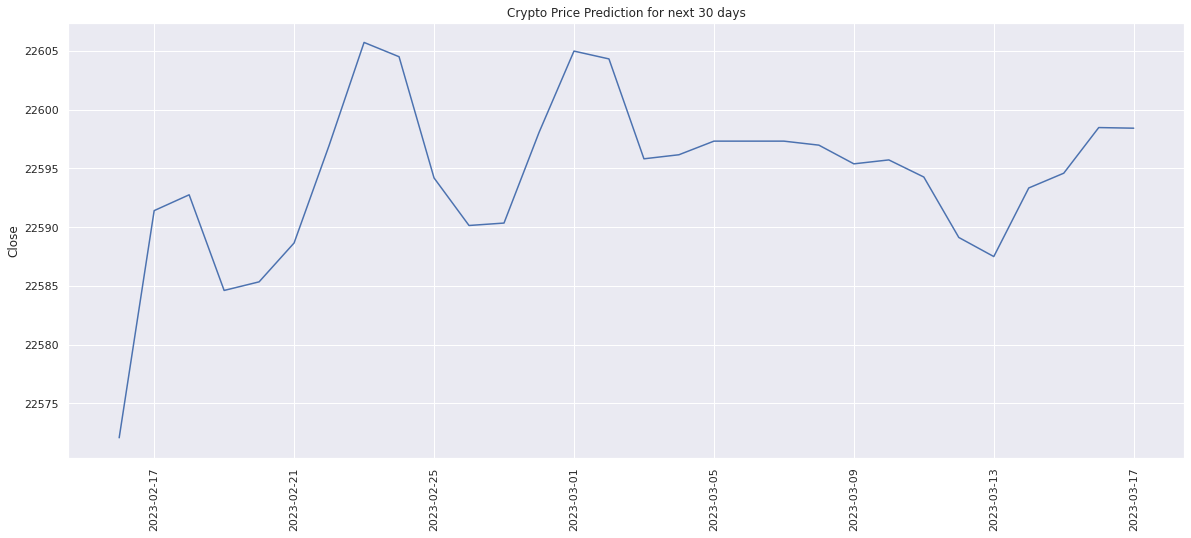

In [ ]:
# plotting the forcasted prices for visual understanding
sns.set_theme()    # setting theme for the chart
plt.figure(figsize=(20,8))    # defining chart size
sns.lineplot(x=forecast_data.index, y=forecast_data.Close)    
plt.xticks(rotation=90)
plt.title('Crypto Price Prediction for next 30 days')